# Transfer Learning

Much of the material is based on Google's codelab [TensorFlow for Poets](https://codelabs.developers.google.com/codelabs/tensorflow-for-poets)

The dataset-folder contains two folders:
"Train" should contain subfolders named after the class of images they contain;
"Test" should contain test images from multiple classes (not present in the training data).

I just used [Fatkun Batch Download Image](https://chrome.google.com/webstore/detail/fatkun-batch-download-ima/nnjjahlikiabnchcpehcpkdeckfgnohf?hl=en) to handle batch downloading from Google Image search results.

In [1]:
# Imports for inline plotting
import matplotlib.image as img
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Add scripts from git submodule to path, in case we want to use them from our code
import os
import sys
module_path = os.path.abspath(os.path.join('./submodules/tensorflow-for-poets-2/scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [15]:
IMAGE_SIZE = 224
ARCHITECTURE = "inception_v3"

#               USE MOBILENET FOR BETTER PERFORMANCE AND SMALLER SIZE AT THE EXPENSE OF ACCURACY, e.g.
# ARCHITECTURE = "mobilenet_0.50_"+str(IMAGE_SIZE)

%set_env IMAGE_SIZE "$IMAGE_SIZE"
%set_env ARCHITECTURE "$ARCHITECTURE"

env: IMAGE_SIZE="224"
env: ARCHITECTURE="inception_v3"


In [4]:
# Start TensorBoard in background process; kill with "pkill tensorboard"
%%bash
tensorboard --logdir tf_files/training_summaries &

TensorBoard attempted to bind to port 6006, but it was already in use


ERROR:tensorflow:TensorBoard attempted to bind to port 6006, but it was already in use


In [23]:
# Open TensorBoard in our browser
import webbrowser
webbrowser.open('http://0.0.0.0:6006/')

True

In [37]:
%%time
# Retrain the model on our dataset

import datetime
DATETIME = datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
%set_env DATETIME "$DATETIME"

%run ./submodules/tensorflow-for-poets-2/scripts/retrain \
  --bottleneck_dir=tf_files/bottlenecks \
  --how_many_training_steps=4000 \
  --learning_rate=0.01 \
  --model_dir=tf_files/models/ \
  --summaries_dir=tf_files/training_summaries/"$ARCHITECTURE"_"$DATETIME" \
  --output_graph=tf_files/retrained_graph.pb \
  --output_labels=tf_files/retrained_labels.txt \
  --architecture="$ARCHITECTURE" \
  --image_dir=dataset/train

env: DATETIME="2017-10-18_13:37:13"
INFO:tensorflow:Looking for images in 'vulcan'


INFO:tensorflow:Looking for images in 'vulcan'


INFO:tensorflow:Looking for images in 'cardassian'


INFO:tensorflow:Looking for images in 'cardassian'


INFO:tensorflow:Looking for images in 'jem hadar'


INFO:tensorflow:Looking for images in 'jem hadar'


INFO:tensorflow:Looking for images in 'borg'


INFO:tensorflow:Looking for images in 'borg'


INFO:tensorflow:Looking for images in 'klingon'


INFO:tensorflow:Looking for images in 'klingon'


INFO:tensorflow:Looking for images in 'human'


INFO:tensorflow:Looking for images in 'human'


INFO:tensorflow:Looking for images in 'ferengi'


INFO:tensorflow:Looking for images in 'ferengi'


INFO:tensorflow:100 bottleneck files created.


INFO:tensorflow:100 bottleneck files created.


INFO:tensorflow:2017-10-18 13:37:21.366192: Step 0: Train accuracy = 49.0%


INFO:tensorflow:2017-10-18 13:37:21.366192: Step 0: Train accuracy = 49.0%


INFO:tensorflow:2017-10-18 13:37:21.367987: Step 0: Cross entropy = 1.879663


INFO:tensorflow:2017-10-18 13:37:21.367987: Step 0: Cross entropy = 1.879663


INFO:tensorflow:2017-10-18 13:37:21.455474: Step 0: Validation accuracy = 48.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:21.455474: Step 0: Validation accuracy = 48.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:22.259515: Step 10: Train accuracy = 92.0%


INFO:tensorflow:2017-10-18 13:37:22.259515: Step 10: Train accuracy = 92.0%


INFO:tensorflow:2017-10-18 13:37:22.261077: Step 10: Cross entropy = 1.574620


INFO:tensorflow:2017-10-18 13:37:22.261077: Step 10: Cross entropy = 1.574620


INFO:tensorflow:2017-10-18 13:37:22.335553: Step 10: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:22.335553: Step 10: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:23.262168: Step 20: Train accuracy = 92.0%


INFO:tensorflow:2017-10-18 13:37:23.262168: Step 20: Train accuracy = 92.0%


INFO:tensorflow:2017-10-18 13:37:23.263696: Step 20: Cross entropy = 1.294577


INFO:tensorflow:2017-10-18 13:37:23.263696: Step 20: Cross entropy = 1.294577


INFO:tensorflow:2017-10-18 13:37:23.352879: Step 20: Validation accuracy = 58.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:23.352879: Step 20: Validation accuracy = 58.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:24.223595: Step 30: Train accuracy = 96.0%


INFO:tensorflow:2017-10-18 13:37:24.223595: Step 30: Train accuracy = 96.0%


INFO:tensorflow:2017-10-18 13:37:24.225184: Step 30: Cross entropy = 1.118425


INFO:tensorflow:2017-10-18 13:37:24.225184: Step 30: Cross entropy = 1.118425


INFO:tensorflow:2017-10-18 13:37:24.305590: Step 30: Validation accuracy = 69.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:24.305590: Step 30: Validation accuracy = 69.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:25.052589: Step 40: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:25.052589: Step 40: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:25.054075: Step 40: Cross entropy = 0.987225


INFO:tensorflow:2017-10-18 13:37:25.054075: Step 40: Cross entropy = 0.987225


INFO:tensorflow:2017-10-18 13:37:25.124340: Step 40: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:25.124340: Step 40: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:25.809961: Step 50: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:25.809961: Step 50: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:25.811956: Step 50: Cross entropy = 0.866753


INFO:tensorflow:2017-10-18 13:37:25.811956: Step 50: Cross entropy = 0.866753


INFO:tensorflow:2017-10-18 13:37:25.894752: Step 50: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:25.894752: Step 50: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:26.596199: Step 60: Train accuracy = 98.0%


INFO:tensorflow:2017-10-18 13:37:26.596199: Step 60: Train accuracy = 98.0%


INFO:tensorflow:2017-10-18 13:37:26.597566: Step 60: Cross entropy = 0.766344


INFO:tensorflow:2017-10-18 13:37:26.597566: Step 60: Cross entropy = 0.766344


INFO:tensorflow:2017-10-18 13:37:26.668017: Step 60: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:26.668017: Step 60: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:27.424936: Step 70: Train accuracy = 99.0%


INFO:tensorflow:2017-10-18 13:37:27.424936: Step 70: Train accuracy = 99.0%


INFO:tensorflow:2017-10-18 13:37:27.426418: Step 70: Cross entropy = 0.691128


INFO:tensorflow:2017-10-18 13:37:27.426418: Step 70: Cross entropy = 0.691128


INFO:tensorflow:2017-10-18 13:37:27.499659: Step 70: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:27.499659: Step 70: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:28.294050: Step 80: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:28.294050: Step 80: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:28.295577: Step 80: Cross entropy = 0.653633


INFO:tensorflow:2017-10-18 13:37:28.295577: Step 80: Cross entropy = 0.653633


INFO:tensorflow:2017-10-18 13:37:28.369201: Step 80: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:28.369201: Step 80: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:29.080749: Step 90: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:29.080749: Step 90: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:29.082157: Step 90: Cross entropy = 0.531147


INFO:tensorflow:2017-10-18 13:37:29.082157: Step 90: Cross entropy = 0.531147


INFO:tensorflow:2017-10-18 13:37:29.149322: Step 90: Validation accuracy = 71.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:29.149322: Step 90: Validation accuracy = 71.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:29.941319: Step 100: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:29.941319: Step 100: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:29.942909: Step 100: Cross entropy = 0.520950


INFO:tensorflow:2017-10-18 13:37:29.942909: Step 100: Cross entropy = 0.520950


INFO:tensorflow:2017-10-18 13:37:30.027922: Step 100: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:30.027922: Step 100: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:30.845571: Step 110: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:30.845571: Step 110: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:30.847999: Step 110: Cross entropy = 0.449741


INFO:tensorflow:2017-10-18 13:37:30.847999: Step 110: Cross entropy = 0.449741


INFO:tensorflow:2017-10-18 13:37:30.965042: Step 110: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:30.965042: Step 110: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:31.726907: Step 120: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:31.726907: Step 120: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:31.728994: Step 120: Cross entropy = 0.443052


INFO:tensorflow:2017-10-18 13:37:31.728994: Step 120: Cross entropy = 0.443052


INFO:tensorflow:2017-10-18 13:37:31.890592: Step 120: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:31.890592: Step 120: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:32.672611: Step 130: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:32.672611: Step 130: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:32.674122: Step 130: Cross entropy = 0.420818


INFO:tensorflow:2017-10-18 13:37:32.674122: Step 130: Cross entropy = 0.420818


INFO:tensorflow:2017-10-18 13:37:32.763487: Step 130: Validation accuracy = 71.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:32.763487: Step 130: Validation accuracy = 71.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:33.527057: Step 140: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:33.527057: Step 140: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:33.528594: Step 140: Cross entropy = 0.417833


INFO:tensorflow:2017-10-18 13:37:33.528594: Step 140: Cross entropy = 0.417833


INFO:tensorflow:2017-10-18 13:37:33.602259: Step 140: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:33.602259: Step 140: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:34.347186: Step 150: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:34.347186: Step 150: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:34.348683: Step 150: Cross entropy = 0.360221


INFO:tensorflow:2017-10-18 13:37:34.348683: Step 150: Cross entropy = 0.360221


INFO:tensorflow:2017-10-18 13:37:34.423372: Step 150: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:34.423372: Step 150: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:35.171187: Step 160: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:35.171187: Step 160: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:35.172790: Step 160: Cross entropy = 0.356639


INFO:tensorflow:2017-10-18 13:37:35.172790: Step 160: Cross entropy = 0.356639


INFO:tensorflow:2017-10-18 13:37:35.261043: Step 160: Validation accuracy = 71.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:35.261043: Step 160: Validation accuracy = 71.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:36.098435: Step 170: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:36.098435: Step 170: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:36.100025: Step 170: Cross entropy = 0.342575


INFO:tensorflow:2017-10-18 13:37:36.100025: Step 170: Cross entropy = 0.342575


INFO:tensorflow:2017-10-18 13:37:36.173141: Step 170: Validation accuracy = 68.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:36.173141: Step 170: Validation accuracy = 68.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:36.955018: Step 180: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:36.955018: Step 180: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:36.956465: Step 180: Cross entropy = 0.320415


INFO:tensorflow:2017-10-18 13:37:36.956465: Step 180: Cross entropy = 0.320415


INFO:tensorflow:2017-10-18 13:37:37.027633: Step 180: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:37.027633: Step 180: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:37.731658: Step 190: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:37.731658: Step 190: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:37.733174: Step 190: Cross entropy = 0.290508


INFO:tensorflow:2017-10-18 13:37:37.733174: Step 190: Cross entropy = 0.290508


INFO:tensorflow:2017-10-18 13:37:37.820316: Step 190: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:37.820316: Step 190: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:38.556383: Step 200: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:38.556383: Step 200: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:38.557621: Step 200: Cross entropy = 0.288426


INFO:tensorflow:2017-10-18 13:37:38.557621: Step 200: Cross entropy = 0.288426


INFO:tensorflow:2017-10-18 13:37:38.621694: Step 200: Validation accuracy = 59.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:38.621694: Step 200: Validation accuracy = 59.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:39.306571: Step 210: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:39.306571: Step 210: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:39.308026: Step 210: Cross entropy = 0.276333


INFO:tensorflow:2017-10-18 13:37:39.308026: Step 210: Cross entropy = 0.276333


INFO:tensorflow:2017-10-18 13:37:39.375316: Step 210: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:39.375316: Step 210: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:40.020060: Step 220: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:40.020060: Step 220: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:40.021458: Step 220: Cross entropy = 0.251094


INFO:tensorflow:2017-10-18 13:37:40.021458: Step 220: Cross entropy = 0.251094


INFO:tensorflow:2017-10-18 13:37:40.092782: Step 220: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:40.092782: Step 220: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:40.746511: Step 230: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:40.746511: Step 230: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:40.748074: Step 230: Cross entropy = 0.238302


INFO:tensorflow:2017-10-18 13:37:40.748074: Step 230: Cross entropy = 0.238302


INFO:tensorflow:2017-10-18 13:37:40.826335: Step 230: Validation accuracy = 70.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:40.826335: Step 230: Validation accuracy = 70.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:41.472377: Step 240: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:41.472377: Step 240: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:41.473839: Step 240: Cross entropy = 0.224584


INFO:tensorflow:2017-10-18 13:37:41.473839: Step 240: Cross entropy = 0.224584


INFO:tensorflow:2017-10-18 13:37:41.544186: Step 240: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:41.544186: Step 240: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:42.199734: Step 250: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:42.199734: Step 250: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:42.201339: Step 250: Cross entropy = 0.215360


INFO:tensorflow:2017-10-18 13:37:42.201339: Step 250: Cross entropy = 0.215360


INFO:tensorflow:2017-10-18 13:37:42.275463: Step 250: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:42.275463: Step 250: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:42.986325: Step 260: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:42.986325: Step 260: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:42.987706: Step 260: Cross entropy = 0.231195


INFO:tensorflow:2017-10-18 13:37:42.987706: Step 260: Cross entropy = 0.231195


INFO:tensorflow:2017-10-18 13:37:43.060012: Step 260: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:43.060012: Step 260: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:43.864852: Step 270: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:43.864852: Step 270: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:43.866311: Step 270: Cross entropy = 0.205693


INFO:tensorflow:2017-10-18 13:37:43.866311: Step 270: Cross entropy = 0.205693


INFO:tensorflow:2017-10-18 13:37:43.944141: Step 270: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:43.944141: Step 270: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:44.700117: Step 280: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:44.700117: Step 280: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:44.702371: Step 280: Cross entropy = 0.193212


INFO:tensorflow:2017-10-18 13:37:44.702371: Step 280: Cross entropy = 0.193212


INFO:tensorflow:2017-10-18 13:37:44.804998: Step 280: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:44.804998: Step 280: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:45.606396: Step 290: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:45.606396: Step 290: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:45.607805: Step 290: Cross entropy = 0.186927


INFO:tensorflow:2017-10-18 13:37:45.607805: Step 290: Cross entropy = 0.186927


INFO:tensorflow:2017-10-18 13:37:45.690389: Step 290: Validation accuracy = 90.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:45.690389: Step 290: Validation accuracy = 90.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:47.071448: Step 300: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:47.071448: Step 300: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:47.073465: Step 300: Cross entropy = 0.172972


INFO:tensorflow:2017-10-18 13:37:47.073465: Step 300: Cross entropy = 0.172972


INFO:tensorflow:2017-10-18 13:37:47.151028: Step 300: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:47.151028: Step 300: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:48.482538: Step 310: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:48.482538: Step 310: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:48.484864: Step 310: Cross entropy = 0.158048


INFO:tensorflow:2017-10-18 13:37:48.484864: Step 310: Cross entropy = 0.158048


INFO:tensorflow:2017-10-18 13:37:48.611986: Step 310: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:48.611986: Step 310: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:49.390087: Step 320: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:49.390087: Step 320: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:49.392753: Step 320: Cross entropy = 0.176601


INFO:tensorflow:2017-10-18 13:37:49.392753: Step 320: Cross entropy = 0.176601


INFO:tensorflow:2017-10-18 13:37:49.481351: Step 320: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:49.481351: Step 320: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:50.179541: Step 330: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:50.179541: Step 330: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:50.181012: Step 330: Cross entropy = 0.169413


INFO:tensorflow:2017-10-18 13:37:50.181012: Step 330: Cross entropy = 0.169413


INFO:tensorflow:2017-10-18 13:37:50.255878: Step 330: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:50.255878: Step 330: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:50.932996: Step 340: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:50.932996: Step 340: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:50.934362: Step 340: Cross entropy = 0.151988


INFO:tensorflow:2017-10-18 13:37:50.934362: Step 340: Cross entropy = 0.151988


INFO:tensorflow:2017-10-18 13:37:51.004531: Step 340: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:51.004531: Step 340: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:51.657535: Step 350: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:51.657535: Step 350: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:51.658907: Step 350: Cross entropy = 0.140600


INFO:tensorflow:2017-10-18 13:37:51.658907: Step 350: Cross entropy = 0.140600


INFO:tensorflow:2017-10-18 13:37:51.731943: Step 350: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:51.731943: Step 350: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:52.384523: Step 360: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:52.384523: Step 360: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:52.386222: Step 360: Cross entropy = 0.148359


INFO:tensorflow:2017-10-18 13:37:52.386222: Step 360: Cross entropy = 0.148359


INFO:tensorflow:2017-10-18 13:37:52.452751: Step 360: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:52.452751: Step 360: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:53.148077: Step 370: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:53.148077: Step 370: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:53.149519: Step 370: Cross entropy = 0.163430


INFO:tensorflow:2017-10-18 13:37:53.149519: Step 370: Cross entropy = 0.163430


INFO:tensorflow:2017-10-18 13:37:53.242581: Step 370: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:53.242581: Step 370: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:53.951768: Step 380: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:53.951768: Step 380: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:53.953160: Step 380: Cross entropy = 0.147626


INFO:tensorflow:2017-10-18 13:37:53.953160: Step 380: Cross entropy = 0.147626


INFO:tensorflow:2017-10-18 13:37:54.024373: Step 380: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:54.024373: Step 380: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:54.658745: Step 390: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:54.658745: Step 390: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:54.660094: Step 390: Cross entropy = 0.135783


INFO:tensorflow:2017-10-18 13:37:54.660094: Step 390: Cross entropy = 0.135783


INFO:tensorflow:2017-10-18 13:37:54.735793: Step 390: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:54.735793: Step 390: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:55.453834: Step 400: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:55.453834: Step 400: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:55.455193: Step 400: Cross entropy = 0.132227


INFO:tensorflow:2017-10-18 13:37:55.455193: Step 400: Cross entropy = 0.132227


INFO:tensorflow:2017-10-18 13:37:55.524382: Step 400: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:55.524382: Step 400: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:56.186097: Step 410: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:56.186097: Step 410: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:56.187404: Step 410: Cross entropy = 0.139088


INFO:tensorflow:2017-10-18 13:37:56.187404: Step 410: Cross entropy = 0.139088


INFO:tensorflow:2017-10-18 13:37:56.261626: Step 410: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:56.261626: Step 410: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:56.893268: Step 420: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:56.893268: Step 420: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:56.894817: Step 420: Cross entropy = 0.131417


INFO:tensorflow:2017-10-18 13:37:56.894817: Step 420: Cross entropy = 0.131417


INFO:tensorflow:2017-10-18 13:37:56.957083: Step 420: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:56.957083: Step 420: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:57.602162: Step 430: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:57.602162: Step 430: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:57.603482: Step 430: Cross entropy = 0.111204


INFO:tensorflow:2017-10-18 13:37:57.603482: Step 430: Cross entropy = 0.111204


INFO:tensorflow:2017-10-18 13:37:57.673705: Step 430: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:57.673705: Step 430: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:58.342371: Step 440: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:58.342371: Step 440: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:58.343893: Step 440: Cross entropy = 0.128246


INFO:tensorflow:2017-10-18 13:37:58.343893: Step 440: Cross entropy = 0.128246


INFO:tensorflow:2017-10-18 13:37:58.413590: Step 440: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:58.413590: Step 440: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:59.076671: Step 450: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:59.076671: Step 450: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:59.078163: Step 450: Cross entropy = 0.116507


INFO:tensorflow:2017-10-18 13:37:59.078163: Step 450: Cross entropy = 0.116507


INFO:tensorflow:2017-10-18 13:37:59.149342: Step 450: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:59.149342: Step 450: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:59.816914: Step 460: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:59.816914: Step 460: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:37:59.818651: Step 460: Cross entropy = 0.129385


INFO:tensorflow:2017-10-18 13:37:59.818651: Step 460: Cross entropy = 0.129385


INFO:tensorflow:2017-10-18 13:37:59.893198: Step 460: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:37:59.893198: Step 460: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:00.543655: Step 470: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:00.543655: Step 470: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:00.545214: Step 470: Cross entropy = 0.113049


INFO:tensorflow:2017-10-18 13:38:00.545214: Step 470: Cross entropy = 0.113049


INFO:tensorflow:2017-10-18 13:38:00.612663: Step 470: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:00.612663: Step 470: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:01.272294: Step 480: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:01.272294: Step 480: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:01.273708: Step 480: Cross entropy = 0.102353


INFO:tensorflow:2017-10-18 13:38:01.273708: Step 480: Cross entropy = 0.102353


INFO:tensorflow:2017-10-18 13:38:01.344326: Step 480: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:01.344326: Step 480: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:02.040397: Step 490: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:02.040397: Step 490: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:02.041800: Step 490: Cross entropy = 0.108234


INFO:tensorflow:2017-10-18 13:38:02.041800: Step 490: Cross entropy = 0.108234


INFO:tensorflow:2017-10-18 13:38:02.112038: Step 490: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:02.112038: Step 490: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:02.772208: Step 500: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:02.772208: Step 500: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:02.773928: Step 500: Cross entropy = 0.116031


INFO:tensorflow:2017-10-18 13:38:02.773928: Step 500: Cross entropy = 0.116031


INFO:tensorflow:2017-10-18 13:38:02.873610: Step 500: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:02.873610: Step 500: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:03.569708: Step 510: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:03.569708: Step 510: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:03.571163: Step 510: Cross entropy = 0.103812


INFO:tensorflow:2017-10-18 13:38:03.571163: Step 510: Cross entropy = 0.103812


INFO:tensorflow:2017-10-18 13:38:03.644017: Step 510: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:03.644017: Step 510: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:04.346475: Step 520: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:04.346475: Step 520: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:04.348047: Step 520: Cross entropy = 0.087194


INFO:tensorflow:2017-10-18 13:38:04.348047: Step 520: Cross entropy = 0.087194


INFO:tensorflow:2017-10-18 13:38:04.421192: Step 520: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:04.421192: Step 520: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:05.087202: Step 530: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:05.087202: Step 530: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:05.088579: Step 530: Cross entropy = 0.110417


INFO:tensorflow:2017-10-18 13:38:05.088579: Step 530: Cross entropy = 0.110417


INFO:tensorflow:2017-10-18 13:38:05.155412: Step 530: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:05.155412: Step 530: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:05.819528: Step 540: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:05.819528: Step 540: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:05.821273: Step 540: Cross entropy = 0.088091


INFO:tensorflow:2017-10-18 13:38:05.821273: Step 540: Cross entropy = 0.088091


INFO:tensorflow:2017-10-18 13:38:05.899080: Step 540: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:05.899080: Step 540: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:06.535211: Step 550: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:06.535211: Step 550: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:06.536572: Step 550: Cross entropy = 0.096842


INFO:tensorflow:2017-10-18 13:38:06.536572: Step 550: Cross entropy = 0.096842


INFO:tensorflow:2017-10-18 13:38:06.603331: Step 550: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:06.603331: Step 550: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:07.265869: Step 560: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:07.265869: Step 560: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:07.267301: Step 560: Cross entropy = 0.087918


INFO:tensorflow:2017-10-18 13:38:07.267301: Step 560: Cross entropy = 0.087918


INFO:tensorflow:2017-10-18 13:38:07.338809: Step 560: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:07.338809: Step 560: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:08.010669: Step 570: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:08.010669: Step 570: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:08.012561: Step 570: Cross entropy = 0.087160


INFO:tensorflow:2017-10-18 13:38:08.012561: Step 570: Cross entropy = 0.087160


INFO:tensorflow:2017-10-18 13:38:08.088071: Step 570: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:08.088071: Step 570: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:08.794332: Step 580: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:08.794332: Step 580: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:08.796026: Step 580: Cross entropy = 0.095826


INFO:tensorflow:2017-10-18 13:38:08.796026: Step 580: Cross entropy = 0.095826


INFO:tensorflow:2017-10-18 13:38:08.880461: Step 580: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:08.880461: Step 580: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:09.549787: Step 590: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:09.549787: Step 590: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:09.551308: Step 590: Cross entropy = 0.088627


INFO:tensorflow:2017-10-18 13:38:09.551308: Step 590: Cross entropy = 0.088627


INFO:tensorflow:2017-10-18 13:38:09.625474: Step 590: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:09.625474: Step 590: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:10.308655: Step 600: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:10.308655: Step 600: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:10.310095: Step 600: Cross entropy = 0.091925


INFO:tensorflow:2017-10-18 13:38:10.310095: Step 600: Cross entropy = 0.091925


INFO:tensorflow:2017-10-18 13:38:10.375851: Step 600: Validation accuracy = 71.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:10.375851: Step 600: Validation accuracy = 71.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:11.182387: Step 610: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:11.182387: Step 610: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:11.183809: Step 610: Cross entropy = 0.079833


INFO:tensorflow:2017-10-18 13:38:11.183809: Step 610: Cross entropy = 0.079833


INFO:tensorflow:2017-10-18 13:38:11.259541: Step 610: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:11.259541: Step 610: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:11.983786: Step 620: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:11.983786: Step 620: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:11.985381: Step 620: Cross entropy = 0.072665


INFO:tensorflow:2017-10-18 13:38:11.985381: Step 620: Cross entropy = 0.072665


INFO:tensorflow:2017-10-18 13:38:12.053579: Step 620: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:12.053579: Step 620: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:12.719918: Step 630: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:12.719918: Step 630: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:12.721265: Step 630: Cross entropy = 0.082667


INFO:tensorflow:2017-10-18 13:38:12.721265: Step 630: Cross entropy = 0.082667


INFO:tensorflow:2017-10-18 13:38:12.794171: Step 630: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:12.794171: Step 630: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:13.510187: Step 640: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:13.510187: Step 640: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:13.511978: Step 640: Cross entropy = 0.079045


INFO:tensorflow:2017-10-18 13:38:13.511978: Step 640: Cross entropy = 0.079045


INFO:tensorflow:2017-10-18 13:38:13.584904: Step 640: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:13.584904: Step 640: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:14.378817: Step 650: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:14.378817: Step 650: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:14.380507: Step 650: Cross entropy = 0.073138


INFO:tensorflow:2017-10-18 13:38:14.380507: Step 650: Cross entropy = 0.073138


INFO:tensorflow:2017-10-18 13:38:14.468941: Step 650: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:14.468941: Step 650: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:15.354894: Step 660: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:15.354894: Step 660: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:15.356959: Step 660: Cross entropy = 0.080235


INFO:tensorflow:2017-10-18 13:38:15.356959: Step 660: Cross entropy = 0.080235


INFO:tensorflow:2017-10-18 13:38:15.434200: Step 660: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:15.434200: Step 660: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:16.262888: Step 670: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:16.262888: Step 670: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:16.264489: Step 670: Cross entropy = 0.070823


INFO:tensorflow:2017-10-18 13:38:16.264489: Step 670: Cross entropy = 0.070823


INFO:tensorflow:2017-10-18 13:38:16.338617: Step 670: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:16.338617: Step 670: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:17.342399: Step 680: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:17.342399: Step 680: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:17.343813: Step 680: Cross entropy = 0.069562


INFO:tensorflow:2017-10-18 13:38:17.343813: Step 680: Cross entropy = 0.069562


INFO:tensorflow:2017-10-18 13:38:17.430013: Step 680: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:17.430013: Step 680: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:18.231302: Step 690: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:18.231302: Step 690: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:18.232821: Step 690: Cross entropy = 0.080160


INFO:tensorflow:2017-10-18 13:38:18.232821: Step 690: Cross entropy = 0.080160


INFO:tensorflow:2017-10-18 13:38:18.313415: Step 690: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:18.313415: Step 690: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:19.042286: Step 700: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:19.042286: Step 700: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:19.043655: Step 700: Cross entropy = 0.071885


INFO:tensorflow:2017-10-18 13:38:19.043655: Step 700: Cross entropy = 0.071885


INFO:tensorflow:2017-10-18 13:38:19.111994: Step 700: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:19.111994: Step 700: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:19.826977: Step 710: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:19.826977: Step 710: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:19.828864: Step 710: Cross entropy = 0.079412


INFO:tensorflow:2017-10-18 13:38:19.828864: Step 710: Cross entropy = 0.079412


INFO:tensorflow:2017-10-18 13:38:19.908332: Step 710: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:19.908332: Step 710: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:20.584762: Step 720: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:20.584762: Step 720: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:20.586389: Step 720: Cross entropy = 0.070522


INFO:tensorflow:2017-10-18 13:38:20.586389: Step 720: Cross entropy = 0.070522


INFO:tensorflow:2017-10-18 13:38:20.664389: Step 720: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:20.664389: Step 720: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:21.392370: Step 730: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:21.392370: Step 730: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:21.393910: Step 730: Cross entropy = 0.069248


INFO:tensorflow:2017-10-18 13:38:21.393910: Step 730: Cross entropy = 0.069248


INFO:tensorflow:2017-10-18 13:38:21.463866: Step 730: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:21.463866: Step 730: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:22.125464: Step 740: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:22.125464: Step 740: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:22.126883: Step 740: Cross entropy = 0.069887


INFO:tensorflow:2017-10-18 13:38:22.126883: Step 740: Cross entropy = 0.069887


INFO:tensorflow:2017-10-18 13:38:22.197955: Step 740: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:22.197955: Step 740: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:22.859927: Step 750: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:22.859927: Step 750: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:22.861443: Step 750: Cross entropy = 0.070681


INFO:tensorflow:2017-10-18 13:38:22.861443: Step 750: Cross entropy = 0.070681


INFO:tensorflow:2017-10-18 13:38:22.929271: Step 750: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:22.929271: Step 750: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:23.646748: Step 760: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:23.646748: Step 760: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:23.648167: Step 760: Cross entropy = 0.070632


INFO:tensorflow:2017-10-18 13:38:23.648167: Step 760: Cross entropy = 0.070632


INFO:tensorflow:2017-10-18 13:38:23.722846: Step 760: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:23.722846: Step 760: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:24.427907: Step 770: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:24.427907: Step 770: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:24.429298: Step 770: Cross entropy = 0.062405


INFO:tensorflow:2017-10-18 13:38:24.429298: Step 770: Cross entropy = 0.062405


INFO:tensorflow:2017-10-18 13:38:24.501960: Step 770: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:24.501960: Step 770: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:25.184077: Step 780: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:25.184077: Step 780: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:25.185477: Step 780: Cross entropy = 0.064191


INFO:tensorflow:2017-10-18 13:38:25.185477: Step 780: Cross entropy = 0.064191


INFO:tensorflow:2017-10-18 13:38:25.260175: Step 780: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:25.260175: Step 780: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:25.951147: Step 790: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:25.951147: Step 790: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:25.952552: Step 790: Cross entropy = 0.063559


INFO:tensorflow:2017-10-18 13:38:25.952552: Step 790: Cross entropy = 0.063559


INFO:tensorflow:2017-10-18 13:38:26.024397: Step 790: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:26.024397: Step 790: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:26.682171: Step 800: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:26.682171: Step 800: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:26.683506: Step 800: Cross entropy = 0.061462


INFO:tensorflow:2017-10-18 13:38:26.683506: Step 800: Cross entropy = 0.061462


INFO:tensorflow:2017-10-18 13:38:26.777577: Step 800: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:26.777577: Step 800: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:27.461886: Step 810: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:27.461886: Step 810: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:27.463392: Step 810: Cross entropy = 0.069847


INFO:tensorflow:2017-10-18 13:38:27.463392: Step 810: Cross entropy = 0.069847


INFO:tensorflow:2017-10-18 13:38:27.534914: Step 810: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:27.534914: Step 810: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:28.299390: Step 820: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:28.299390: Step 820: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:28.301011: Step 820: Cross entropy = 0.059552


INFO:tensorflow:2017-10-18 13:38:28.301011: Step 820: Cross entropy = 0.059552


INFO:tensorflow:2017-10-18 13:38:28.377781: Step 820: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:28.377781: Step 820: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:29.129661: Step 830: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:29.129661: Step 830: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:29.131076: Step 830: Cross entropy = 0.060613


INFO:tensorflow:2017-10-18 13:38:29.131076: Step 830: Cross entropy = 0.060613


INFO:tensorflow:2017-10-18 13:38:29.210299: Step 830: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:29.210299: Step 830: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:29.897105: Step 840: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:29.897105: Step 840: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:29.898620: Step 840: Cross entropy = 0.065283


INFO:tensorflow:2017-10-18 13:38:29.898620: Step 840: Cross entropy = 0.065283


INFO:tensorflow:2017-10-18 13:38:29.971723: Step 840: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:29.971723: Step 840: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:30.637269: Step 850: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:30.637269: Step 850: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:30.638615: Step 850: Cross entropy = 0.056261


INFO:tensorflow:2017-10-18 13:38:30.638615: Step 850: Cross entropy = 0.056261


INFO:tensorflow:2017-10-18 13:38:30.714554: Step 850: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:30.714554: Step 850: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:31.406531: Step 860: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:31.406531: Step 860: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:31.407957: Step 860: Cross entropy = 0.056902


INFO:tensorflow:2017-10-18 13:38:31.407957: Step 860: Cross entropy = 0.056902


INFO:tensorflow:2017-10-18 13:38:31.482612: Step 860: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:31.482612: Step 860: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:32.151081: Step 870: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:32.151081: Step 870: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:32.152462: Step 870: Cross entropy = 0.057407


INFO:tensorflow:2017-10-18 13:38:32.152462: Step 870: Cross entropy = 0.057407


INFO:tensorflow:2017-10-18 13:38:32.230918: Step 870: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:32.230918: Step 870: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:32.894913: Step 880: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:32.894913: Step 880: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:32.896464: Step 880: Cross entropy = 0.061682


INFO:tensorflow:2017-10-18 13:38:32.896464: Step 880: Cross entropy = 0.061682


INFO:tensorflow:2017-10-18 13:38:32.969000: Step 880: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:32.969000: Step 880: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:33.690988: Step 890: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:33.690988: Step 890: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:33.692877: Step 890: Cross entropy = 0.058313


INFO:tensorflow:2017-10-18 13:38:33.692877: Step 890: Cross entropy = 0.058313


INFO:tensorflow:2017-10-18 13:38:33.774347: Step 890: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:33.774347: Step 890: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:34.452569: Step 900: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:34.452569: Step 900: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:34.453999: Step 900: Cross entropy = 0.051767


INFO:tensorflow:2017-10-18 13:38:34.453999: Step 900: Cross entropy = 0.051767


INFO:tensorflow:2017-10-18 13:38:34.527664: Step 900: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:34.527664: Step 900: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:35.272736: Step 910: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:35.272736: Step 910: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:35.274181: Step 910: Cross entropy = 0.051916


INFO:tensorflow:2017-10-18 13:38:35.274181: Step 910: Cross entropy = 0.051916


INFO:tensorflow:2017-10-18 13:38:35.333864: Step 910: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:35.333864: Step 910: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:36.064636: Step 920: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:36.064636: Step 920: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:36.066259: Step 920: Cross entropy = 0.047423


INFO:tensorflow:2017-10-18 13:38:36.066259: Step 920: Cross entropy = 0.047423


INFO:tensorflow:2017-10-18 13:38:36.141176: Step 920: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:36.141176: Step 920: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:36.863993: Step 930: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:36.863993: Step 930: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:36.865550: Step 930: Cross entropy = 0.055425


INFO:tensorflow:2017-10-18 13:38:36.865550: Step 930: Cross entropy = 0.055425


INFO:tensorflow:2017-10-18 13:38:36.944993: Step 930: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:36.944993: Step 930: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:37.665633: Step 940: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:37.665633: Step 940: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:37.668217: Step 940: Cross entropy = 0.058997


INFO:tensorflow:2017-10-18 13:38:37.668217: Step 940: Cross entropy = 0.058997


INFO:tensorflow:2017-10-18 13:38:37.758899: Step 940: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:37.758899: Step 940: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:38.431780: Step 950: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:38.431780: Step 950: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:38.433320: Step 950: Cross entropy = 0.058522


INFO:tensorflow:2017-10-18 13:38:38.433320: Step 950: Cross entropy = 0.058522


INFO:tensorflow:2017-10-18 13:38:38.506797: Step 950: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:38.506797: Step 950: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:39.266286: Step 960: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:39.266286: Step 960: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:39.269945: Step 960: Cross entropy = 0.053306


INFO:tensorflow:2017-10-18 13:38:39.269945: Step 960: Cross entropy = 0.053306


INFO:tensorflow:2017-10-18 13:38:39.354280: Step 960: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:39.354280: Step 960: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:40.112309: Step 970: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:40.112309: Step 970: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:40.113832: Step 970: Cross entropy = 0.058753


INFO:tensorflow:2017-10-18 13:38:40.113832: Step 970: Cross entropy = 0.058753


INFO:tensorflow:2017-10-18 13:38:40.184748: Step 970: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:40.184748: Step 970: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:40.843421: Step 980: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:40.843421: Step 980: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:40.845660: Step 980: Cross entropy = 0.050688


INFO:tensorflow:2017-10-18 13:38:40.845660: Step 980: Cross entropy = 0.050688


INFO:tensorflow:2017-10-18 13:38:40.917773: Step 980: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:40.917773: Step 980: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:41.582878: Step 990: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:41.582878: Step 990: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:41.584345: Step 990: Cross entropy = 0.049214


INFO:tensorflow:2017-10-18 13:38:41.584345: Step 990: Cross entropy = 0.049214


INFO:tensorflow:2017-10-18 13:38:41.656515: Step 990: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:41.656515: Step 990: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:42.330576: Step 1000: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:42.330576: Step 1000: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:42.331946: Step 1000: Cross entropy = 0.050953


INFO:tensorflow:2017-10-18 13:38:42.331946: Step 1000: Cross entropy = 0.050953


INFO:tensorflow:2017-10-18 13:38:42.396635: Step 1000: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:42.396635: Step 1000: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:43.095721: Step 1010: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:43.095721: Step 1010: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:43.097314: Step 1010: Cross entropy = 0.052096


INFO:tensorflow:2017-10-18 13:38:43.097314: Step 1010: Cross entropy = 0.052096


INFO:tensorflow:2017-10-18 13:38:43.179159: Step 1010: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:43.179159: Step 1010: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:43.958052: Step 1020: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:43.958052: Step 1020: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:43.959826: Step 1020: Cross entropy = 0.045630


INFO:tensorflow:2017-10-18 13:38:43.959826: Step 1020: Cross entropy = 0.045630


INFO:tensorflow:2017-10-18 13:38:44.039168: Step 1020: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:44.039168: Step 1020: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:44.708826: Step 1030: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:44.708826: Step 1030: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:44.710546: Step 1030: Cross entropy = 0.039843


INFO:tensorflow:2017-10-18 13:38:44.710546: Step 1030: Cross entropy = 0.039843


INFO:tensorflow:2017-10-18 13:38:44.814443: Step 1030: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:44.814443: Step 1030: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:45.610460: Step 1040: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:45.610460: Step 1040: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:45.612863: Step 1040: Cross entropy = 0.044920


INFO:tensorflow:2017-10-18 13:38:45.612863: Step 1040: Cross entropy = 0.044920


INFO:tensorflow:2017-10-18 13:38:45.717465: Step 1040: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:45.717465: Step 1040: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:46.893479: Step 1050: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:46.893479: Step 1050: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:46.895083: Step 1050: Cross entropy = 0.043957


INFO:tensorflow:2017-10-18 13:38:46.895083: Step 1050: Cross entropy = 0.043957


INFO:tensorflow:2017-10-18 13:38:46.984193: Step 1050: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:46.984193: Step 1050: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:47.929477: Step 1060: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:47.929477: Step 1060: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:47.931620: Step 1060: Cross entropy = 0.046246


INFO:tensorflow:2017-10-18 13:38:47.931620: Step 1060: Cross entropy = 0.046246


INFO:tensorflow:2017-10-18 13:38:48.023791: Step 1060: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:48.023791: Step 1060: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:48.773920: Step 1070: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:48.773920: Step 1070: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:48.775509: Step 1070: Cross entropy = 0.044612


INFO:tensorflow:2017-10-18 13:38:48.775509: Step 1070: Cross entropy = 0.044612


INFO:tensorflow:2017-10-18 13:38:48.857377: Step 1070: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:48.857377: Step 1070: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:49.681625: Step 1080: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:49.681625: Step 1080: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:49.684129: Step 1080: Cross entropy = 0.049609


INFO:tensorflow:2017-10-18 13:38:49.684129: Step 1080: Cross entropy = 0.049609


INFO:tensorflow:2017-10-18 13:38:49.813976: Step 1080: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:49.813976: Step 1080: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:50.535115: Step 1090: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:50.535115: Step 1090: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:50.536666: Step 1090: Cross entropy = 0.045595


INFO:tensorflow:2017-10-18 13:38:50.536666: Step 1090: Cross entropy = 0.045595


INFO:tensorflow:2017-10-18 13:38:50.608257: Step 1090: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:50.608257: Step 1090: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:51.283989: Step 1100: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:51.283989: Step 1100: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:51.285399: Step 1100: Cross entropy = 0.043220


INFO:tensorflow:2017-10-18 13:38:51.285399: Step 1100: Cross entropy = 0.043220


INFO:tensorflow:2017-10-18 13:38:51.354864: Step 1100: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:51.354864: Step 1100: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:52.023212: Step 1110: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:52.023212: Step 1110: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:52.024580: Step 1110: Cross entropy = 0.047490


INFO:tensorflow:2017-10-18 13:38:52.024580: Step 1110: Cross entropy = 0.047490


INFO:tensorflow:2017-10-18 13:38:52.096928: Step 1110: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:52.096928: Step 1110: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:52.818619: Step 1120: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:52.818619: Step 1120: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:52.820388: Step 1120: Cross entropy = 0.044190


INFO:tensorflow:2017-10-18 13:38:52.820388: Step 1120: Cross entropy = 0.044190


INFO:tensorflow:2017-10-18 13:38:52.903251: Step 1120: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:52.903251: Step 1120: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:53.669399: Step 1130: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:53.669399: Step 1130: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:53.670961: Step 1130: Cross entropy = 0.047192


INFO:tensorflow:2017-10-18 13:38:53.670961: Step 1130: Cross entropy = 0.047192


INFO:tensorflow:2017-10-18 13:38:53.758094: Step 1130: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:53.758094: Step 1130: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:54.452420: Step 1140: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:54.452420: Step 1140: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:54.453918: Step 1140: Cross entropy = 0.049863


INFO:tensorflow:2017-10-18 13:38:54.453918: Step 1140: Cross entropy = 0.049863


INFO:tensorflow:2017-10-18 13:38:54.527905: Step 1140: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:54.527905: Step 1140: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:55.242869: Step 1150: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:55.242869: Step 1150: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:55.244492: Step 1150: Cross entropy = 0.042945


INFO:tensorflow:2017-10-18 13:38:55.244492: Step 1150: Cross entropy = 0.042945


INFO:tensorflow:2017-10-18 13:38:55.321260: Step 1150: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:55.321260: Step 1150: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:56.017960: Step 1160: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:56.017960: Step 1160: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:56.019410: Step 1160: Cross entropy = 0.042099


INFO:tensorflow:2017-10-18 13:38:56.019410: Step 1160: Cross entropy = 0.042099


INFO:tensorflow:2017-10-18 13:38:56.095744: Step 1160: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:56.095744: Step 1160: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:56.843309: Step 1170: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:56.843309: Step 1170: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:56.844751: Step 1170: Cross entropy = 0.035337


INFO:tensorflow:2017-10-18 13:38:56.844751: Step 1170: Cross entropy = 0.035337


INFO:tensorflow:2017-10-18 13:38:56.918895: Step 1170: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:56.918895: Step 1170: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:57.640653: Step 1180: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:57.640653: Step 1180: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:57.642111: Step 1180: Cross entropy = 0.041176


INFO:tensorflow:2017-10-18 13:38:57.642111: Step 1180: Cross entropy = 0.041176


INFO:tensorflow:2017-10-18 13:38:57.745738: Step 1180: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:57.745738: Step 1180: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:58.421876: Step 1190: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:58.421876: Step 1190: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:58.423589: Step 1190: Cross entropy = 0.044713


INFO:tensorflow:2017-10-18 13:38:58.423589: Step 1190: Cross entropy = 0.044713


INFO:tensorflow:2017-10-18 13:38:58.508507: Step 1190: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:58.508507: Step 1190: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:59.230357: Step 1200: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:59.230357: Step 1200: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:38:59.231976: Step 1200: Cross entropy = 0.038053


INFO:tensorflow:2017-10-18 13:38:59.231976: Step 1200: Cross entropy = 0.038053


INFO:tensorflow:2017-10-18 13:38:59.312902: Step 1200: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:38:59.312902: Step 1200: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:00.020284: Step 1210: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:00.020284: Step 1210: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:00.021804: Step 1210: Cross entropy = 0.046293


INFO:tensorflow:2017-10-18 13:39:00.021804: Step 1210: Cross entropy = 0.046293


INFO:tensorflow:2017-10-18 13:39:00.097000: Step 1210: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:00.097000: Step 1210: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:00.810668: Step 1220: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:00.810668: Step 1220: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:00.812392: Step 1220: Cross entropy = 0.036710


INFO:tensorflow:2017-10-18 13:39:00.812392: Step 1220: Cross entropy = 0.036710


INFO:tensorflow:2017-10-18 13:39:00.882404: Step 1220: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:00.882404: Step 1220: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:01.557651: Step 1230: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:01.557651: Step 1230: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:01.559163: Step 1230: Cross entropy = 0.041428


INFO:tensorflow:2017-10-18 13:39:01.559163: Step 1230: Cross entropy = 0.041428


INFO:tensorflow:2017-10-18 13:39:01.635197: Step 1230: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:01.635197: Step 1230: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:02.359812: Step 1240: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:02.359812: Step 1240: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:02.361692: Step 1240: Cross entropy = 0.039532


INFO:tensorflow:2017-10-18 13:39:02.361692: Step 1240: Cross entropy = 0.039532


INFO:tensorflow:2017-10-18 13:39:02.439576: Step 1240: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:02.439576: Step 1240: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:03.112549: Step 1250: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:03.112549: Step 1250: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:03.113877: Step 1250: Cross entropy = 0.048683


INFO:tensorflow:2017-10-18 13:39:03.113877: Step 1250: Cross entropy = 0.048683


INFO:tensorflow:2017-10-18 13:39:03.192344: Step 1250: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:03.192344: Step 1250: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:04.001801: Step 1260: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:04.001801: Step 1260: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:04.003608: Step 1260: Cross entropy = 0.037210


INFO:tensorflow:2017-10-18 13:39:04.003608: Step 1260: Cross entropy = 0.037210


INFO:tensorflow:2017-10-18 13:39:04.081821: Step 1260: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:04.081821: Step 1260: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:04.784111: Step 1270: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:04.784111: Step 1270: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:04.785867: Step 1270: Cross entropy = 0.037752


INFO:tensorflow:2017-10-18 13:39:04.785867: Step 1270: Cross entropy = 0.037752


INFO:tensorflow:2017-10-18 13:39:04.871491: Step 1270: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:04.871491: Step 1270: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:05.538032: Step 1280: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:05.538032: Step 1280: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:05.539509: Step 1280: Cross entropy = 0.041750


INFO:tensorflow:2017-10-18 13:39:05.539509: Step 1280: Cross entropy = 0.041750


INFO:tensorflow:2017-10-18 13:39:05.613526: Step 1280: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:05.613526: Step 1280: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:06.319996: Step 1290: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:06.319996: Step 1290: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:06.321790: Step 1290: Cross entropy = 0.037585


INFO:tensorflow:2017-10-18 13:39:06.321790: Step 1290: Cross entropy = 0.037585


INFO:tensorflow:2017-10-18 13:39:06.402250: Step 1290: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:06.402250: Step 1290: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:07.067644: Step 1300: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:07.067644: Step 1300: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:07.069025: Step 1300: Cross entropy = 0.037259


INFO:tensorflow:2017-10-18 13:39:07.069025: Step 1300: Cross entropy = 0.037259


INFO:tensorflow:2017-10-18 13:39:07.145172: Step 1300: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:07.145172: Step 1300: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:07.861803: Step 1310: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:07.861803: Step 1310: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:07.863319: Step 1310: Cross entropy = 0.037741


INFO:tensorflow:2017-10-18 13:39:07.863319: Step 1310: Cross entropy = 0.037741


INFO:tensorflow:2017-10-18 13:39:07.936840: Step 1310: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:07.936840: Step 1310: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:08.651673: Step 1320: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:08.651673: Step 1320: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:08.653230: Step 1320: Cross entropy = 0.036938


INFO:tensorflow:2017-10-18 13:39:08.653230: Step 1320: Cross entropy = 0.036938


INFO:tensorflow:2017-10-18 13:39:08.750240: Step 1320: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:08.750240: Step 1320: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:09.493362: Step 1330: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:09.493362: Step 1330: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:09.495550: Step 1330: Cross entropy = 0.035971


INFO:tensorflow:2017-10-18 13:39:09.495550: Step 1330: Cross entropy = 0.035971


INFO:tensorflow:2017-10-18 13:39:09.578664: Step 1330: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:09.578664: Step 1330: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:10.293790: Step 1340: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:10.293790: Step 1340: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:10.295317: Step 1340: Cross entropy = 0.034623


INFO:tensorflow:2017-10-18 13:39:10.295317: Step 1340: Cross entropy = 0.034623


INFO:tensorflow:2017-10-18 13:39:10.365233: Step 1340: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:10.365233: Step 1340: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:11.077933: Step 1350: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:11.077933: Step 1350: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:11.079259: Step 1350: Cross entropy = 0.039007


INFO:tensorflow:2017-10-18 13:39:11.079259: Step 1350: Cross entropy = 0.039007


INFO:tensorflow:2017-10-18 13:39:11.146992: Step 1350: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:11.146992: Step 1350: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:11.871398: Step 1360: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:11.871398: Step 1360: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:11.872909: Step 1360: Cross entropy = 0.034878


INFO:tensorflow:2017-10-18 13:39:11.872909: Step 1360: Cross entropy = 0.034878


INFO:tensorflow:2017-10-18 13:39:11.947212: Step 1360: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:11.947212: Step 1360: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:12.832279: Step 1370: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:12.832279: Step 1370: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:12.836083: Step 1370: Cross entropy = 0.030744


INFO:tensorflow:2017-10-18 13:39:12.836083: Step 1370: Cross entropy = 0.030744


INFO:tensorflow:2017-10-18 13:39:12.930941: Step 1370: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:12.930941: Step 1370: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:13.656328: Step 1380: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:13.656328: Step 1380: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:13.657716: Step 1380: Cross entropy = 0.037632


INFO:tensorflow:2017-10-18 13:39:13.657716: Step 1380: Cross entropy = 0.037632


INFO:tensorflow:2017-10-18 13:39:13.727805: Step 1380: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:13.727805: Step 1380: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:14.390450: Step 1390: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:14.390450: Step 1390: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:14.391797: Step 1390: Cross entropy = 0.037959


INFO:tensorflow:2017-10-18 13:39:14.391797: Step 1390: Cross entropy = 0.037959


INFO:tensorflow:2017-10-18 13:39:14.454686: Step 1390: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:14.454686: Step 1390: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:15.328323: Step 1400: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:15.328323: Step 1400: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:15.330002: Step 1400: Cross entropy = 0.032930


INFO:tensorflow:2017-10-18 13:39:15.330002: Step 1400: Cross entropy = 0.032930


INFO:tensorflow:2017-10-18 13:39:15.437865: Step 1400: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:15.437865: Step 1400: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:16.358389: Step 1410: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:16.358389: Step 1410: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:16.360121: Step 1410: Cross entropy = 0.031506


INFO:tensorflow:2017-10-18 13:39:16.360121: Step 1410: Cross entropy = 0.031506


INFO:tensorflow:2017-10-18 13:39:16.455482: Step 1410: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:16.455482: Step 1410: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:17.359221: Step 1420: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:17.359221: Step 1420: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:17.360928: Step 1420: Cross entropy = 0.034604


INFO:tensorflow:2017-10-18 13:39:17.360928: Step 1420: Cross entropy = 0.034604


INFO:tensorflow:2017-10-18 13:39:17.455600: Step 1420: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:17.455600: Step 1420: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:18.407906: Step 1430: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:18.407906: Step 1430: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:18.409989: Step 1430: Cross entropy = 0.030657


INFO:tensorflow:2017-10-18 13:39:18.409989: Step 1430: Cross entropy = 0.030657


INFO:tensorflow:2017-10-18 13:39:18.494217: Step 1430: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:18.494217: Step 1430: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:19.325003: Step 1440: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:19.325003: Step 1440: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:19.326489: Step 1440: Cross entropy = 0.036099


INFO:tensorflow:2017-10-18 13:39:19.326489: Step 1440: Cross entropy = 0.036099


INFO:tensorflow:2017-10-18 13:39:19.400805: Step 1440: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:19.400805: Step 1440: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:20.111167: Step 1450: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:20.111167: Step 1450: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:20.112583: Step 1450: Cross entropy = 0.035732


INFO:tensorflow:2017-10-18 13:39:20.112583: Step 1450: Cross entropy = 0.035732


INFO:tensorflow:2017-10-18 13:39:20.185438: Step 1450: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:20.185438: Step 1450: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:20.877339: Step 1460: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:20.877339: Step 1460: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:20.878948: Step 1460: Cross entropy = 0.035633


INFO:tensorflow:2017-10-18 13:39:20.878948: Step 1460: Cross entropy = 0.035633


INFO:tensorflow:2017-10-18 13:39:20.953124: Step 1460: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:20.953124: Step 1460: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:21.634604: Step 1470: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:21.634604: Step 1470: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:21.636210: Step 1470: Cross entropy = 0.030996


INFO:tensorflow:2017-10-18 13:39:21.636210: Step 1470: Cross entropy = 0.030996


INFO:tensorflow:2017-10-18 13:39:21.720692: Step 1470: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:21.720692: Step 1470: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:22.443644: Step 1480: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:22.443644: Step 1480: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:22.445004: Step 1480: Cross entropy = 0.034866


INFO:tensorflow:2017-10-18 13:39:22.445004: Step 1480: Cross entropy = 0.034866


INFO:tensorflow:2017-10-18 13:39:22.510271: Step 1480: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:22.510271: Step 1480: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:23.236546: Step 1490: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:23.236546: Step 1490: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:23.238209: Step 1490: Cross entropy = 0.031901


INFO:tensorflow:2017-10-18 13:39:23.238209: Step 1490: Cross entropy = 0.031901


INFO:tensorflow:2017-10-18 13:39:23.320045: Step 1490: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:23.320045: Step 1490: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:24.139304: Step 1500: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:24.139304: Step 1500: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:24.141371: Step 1500: Cross entropy = 0.033950


INFO:tensorflow:2017-10-18 13:39:24.141371: Step 1500: Cross entropy = 0.033950


INFO:tensorflow:2017-10-18 13:39:24.210389: Step 1500: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:24.210389: Step 1500: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:25.058081: Step 1510: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:25.058081: Step 1510: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:25.064686: Step 1510: Cross entropy = 0.029776


INFO:tensorflow:2017-10-18 13:39:25.064686: Step 1510: Cross entropy = 0.029776


INFO:tensorflow:2017-10-18 13:39:25.199289: Step 1510: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:25.199289: Step 1510: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:26.016178: Step 1520: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:26.016178: Step 1520: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:26.017869: Step 1520: Cross entropy = 0.036314


INFO:tensorflow:2017-10-18 13:39:26.017869: Step 1520: Cross entropy = 0.036314


INFO:tensorflow:2017-10-18 13:39:26.095564: Step 1520: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:26.095564: Step 1520: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:26.869944: Step 1530: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:26.869944: Step 1530: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:26.871403: Step 1530: Cross entropy = 0.034448


INFO:tensorflow:2017-10-18 13:39:26.871403: Step 1530: Cross entropy = 0.034448


INFO:tensorflow:2017-10-18 13:39:26.945352: Step 1530: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:26.945352: Step 1530: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:27.641718: Step 1540: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:27.641718: Step 1540: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:27.643498: Step 1540: Cross entropy = 0.028611


INFO:tensorflow:2017-10-18 13:39:27.643498: Step 1540: Cross entropy = 0.028611


INFO:tensorflow:2017-10-18 13:39:27.788949: Step 1540: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:27.788949: Step 1540: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:28.500302: Step 1550: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:28.500302: Step 1550: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:28.501598: Step 1550: Cross entropy = 0.028493


INFO:tensorflow:2017-10-18 13:39:28.501598: Step 1550: Cross entropy = 0.028493


INFO:tensorflow:2017-10-18 13:39:28.573963: Step 1550: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:28.573963: Step 1550: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:29.314753: Step 1560: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:29.314753: Step 1560: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:29.316292: Step 1560: Cross entropy = 0.031479


INFO:tensorflow:2017-10-18 13:39:29.316292: Step 1560: Cross entropy = 0.031479


INFO:tensorflow:2017-10-18 13:39:29.388214: Step 1560: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:29.388214: Step 1560: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:30.100886: Step 1570: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:30.100886: Step 1570: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:30.102331: Step 1570: Cross entropy = 0.026379


INFO:tensorflow:2017-10-18 13:39:30.102331: Step 1570: Cross entropy = 0.026379


INFO:tensorflow:2017-10-18 13:39:30.172974: Step 1570: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:30.172974: Step 1570: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:30.862638: Step 1580: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:30.862638: Step 1580: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:30.864125: Step 1580: Cross entropy = 0.031979


INFO:tensorflow:2017-10-18 13:39:30.864125: Step 1580: Cross entropy = 0.031979


INFO:tensorflow:2017-10-18 13:39:30.937813: Step 1580: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:30.937813: Step 1580: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:31.589354: Step 1590: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:31.589354: Step 1590: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:31.590693: Step 1590: Cross entropy = 0.029449


INFO:tensorflow:2017-10-18 13:39:31.590693: Step 1590: Cross entropy = 0.029449


INFO:tensorflow:2017-10-18 13:39:31.664192: Step 1590: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:31.664192: Step 1590: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:32.365225: Step 1600: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:32.365225: Step 1600: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:32.366724: Step 1600: Cross entropy = 0.032474


INFO:tensorflow:2017-10-18 13:39:32.366724: Step 1600: Cross entropy = 0.032474


INFO:tensorflow:2017-10-18 13:39:32.437477: Step 1600: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:32.437477: Step 1600: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:33.108449: Step 1610: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:33.108449: Step 1610: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:33.109850: Step 1610: Cross entropy = 0.032497


INFO:tensorflow:2017-10-18 13:39:33.109850: Step 1610: Cross entropy = 0.032497


INFO:tensorflow:2017-10-18 13:39:33.176916: Step 1610: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:33.176916: Step 1610: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:33.855838: Step 1620: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:33.855838: Step 1620: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:33.857465: Step 1620: Cross entropy = 0.032535


INFO:tensorflow:2017-10-18 13:39:33.857465: Step 1620: Cross entropy = 0.032535


INFO:tensorflow:2017-10-18 13:39:33.931749: Step 1620: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:33.931749: Step 1620: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:34.631255: Step 1630: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:34.631255: Step 1630: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:34.632725: Step 1630: Cross entropy = 0.029174


INFO:tensorflow:2017-10-18 13:39:34.632725: Step 1630: Cross entropy = 0.029174


INFO:tensorflow:2017-10-18 13:39:34.716739: Step 1630: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:34.716739: Step 1630: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:35.478629: Step 1640: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:35.478629: Step 1640: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:35.480125: Step 1640: Cross entropy = 0.029128


INFO:tensorflow:2017-10-18 13:39:35.480125: Step 1640: Cross entropy = 0.029128


INFO:tensorflow:2017-10-18 13:39:35.554944: Step 1640: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:35.554944: Step 1640: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:36.242227: Step 1650: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:36.242227: Step 1650: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:36.244212: Step 1650: Cross entropy = 0.028079


INFO:tensorflow:2017-10-18 13:39:36.244212: Step 1650: Cross entropy = 0.028079


INFO:tensorflow:2017-10-18 13:39:36.316907: Step 1650: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:36.316907: Step 1650: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:36.969893: Step 1660: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:36.969893: Step 1660: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:36.971274: Step 1660: Cross entropy = 0.030603


INFO:tensorflow:2017-10-18 13:39:36.971274: Step 1660: Cross entropy = 0.030603


INFO:tensorflow:2017-10-18 13:39:37.040099: Step 1660: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:37.040099: Step 1660: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:37.689698: Step 1670: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:37.689698: Step 1670: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:37.691754: Step 1670: Cross entropy = 0.028980


INFO:tensorflow:2017-10-18 13:39:37.691754: Step 1670: Cross entropy = 0.028980


INFO:tensorflow:2017-10-18 13:39:37.779493: Step 1670: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:37.779493: Step 1670: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:38.416784: Step 1680: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:38.416784: Step 1680: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:38.418194: Step 1680: Cross entropy = 0.028834


INFO:tensorflow:2017-10-18 13:39:38.418194: Step 1680: Cross entropy = 0.028834


INFO:tensorflow:2017-10-18 13:39:38.486262: Step 1680: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:38.486262: Step 1680: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:39.131103: Step 1690: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:39.131103: Step 1690: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:39.132454: Step 1690: Cross entropy = 0.025658


INFO:tensorflow:2017-10-18 13:39:39.132454: Step 1690: Cross entropy = 0.025658


INFO:tensorflow:2017-10-18 13:39:39.204053: Step 1690: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:39.204053: Step 1690: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:39.865002: Step 1700: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:39.865002: Step 1700: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:39.866373: Step 1700: Cross entropy = 0.025741


INFO:tensorflow:2017-10-18 13:39:39.866373: Step 1700: Cross entropy = 0.025741


INFO:tensorflow:2017-10-18 13:39:39.938078: Step 1700: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:39.938078: Step 1700: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:40.583554: Step 1710: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:40.583554: Step 1710: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:40.584929: Step 1710: Cross entropy = 0.024859


INFO:tensorflow:2017-10-18 13:39:40.584929: Step 1710: Cross entropy = 0.024859


INFO:tensorflow:2017-10-18 13:39:40.652418: Step 1710: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:40.652418: Step 1710: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:41.313593: Step 1720: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:41.313593: Step 1720: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:41.315717: Step 1720: Cross entropy = 0.025689


INFO:tensorflow:2017-10-18 13:39:41.315717: Step 1720: Cross entropy = 0.025689


INFO:tensorflow:2017-10-18 13:39:41.379605: Step 1720: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:41.379605: Step 1720: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:42.008832: Step 1730: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:42.008832: Step 1730: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:42.010397: Step 1730: Cross entropy = 0.025877


INFO:tensorflow:2017-10-18 13:39:42.010397: Step 1730: Cross entropy = 0.025877


INFO:tensorflow:2017-10-18 13:39:42.076619: Step 1730: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:42.076619: Step 1730: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:42.719652: Step 1740: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:42.719652: Step 1740: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:42.721121: Step 1740: Cross entropy = 0.025681


INFO:tensorflow:2017-10-18 13:39:42.721121: Step 1740: Cross entropy = 0.025681


INFO:tensorflow:2017-10-18 13:39:42.801198: Step 1740: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:42.801198: Step 1740: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:43.450519: Step 1750: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:43.450519: Step 1750: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:43.452017: Step 1750: Cross entropy = 0.028319


INFO:tensorflow:2017-10-18 13:39:43.452017: Step 1750: Cross entropy = 0.028319


INFO:tensorflow:2017-10-18 13:39:43.521786: Step 1750: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:43.521786: Step 1750: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:44.158877: Step 1760: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:44.158877: Step 1760: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:44.160208: Step 1760: Cross entropy = 0.029952


INFO:tensorflow:2017-10-18 13:39:44.160208: Step 1760: Cross entropy = 0.029952


INFO:tensorflow:2017-10-18 13:39:44.233048: Step 1760: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:44.233048: Step 1760: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:44.886426: Step 1770: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:44.886426: Step 1770: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:44.887766: Step 1770: Cross entropy = 0.027051


INFO:tensorflow:2017-10-18 13:39:44.887766: Step 1770: Cross entropy = 0.027051


INFO:tensorflow:2017-10-18 13:39:44.954679: Step 1770: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:44.954679: Step 1770: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:45.596613: Step 1780: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:45.596613: Step 1780: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:45.597979: Step 1780: Cross entropy = 0.027324


INFO:tensorflow:2017-10-18 13:39:45.597979: Step 1780: Cross entropy = 0.027324


INFO:tensorflow:2017-10-18 13:39:45.667878: Step 1780: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:45.667878: Step 1780: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:46.472020: Step 1790: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:46.472020: Step 1790: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:46.473417: Step 1790: Cross entropy = 0.023574


INFO:tensorflow:2017-10-18 13:39:46.473417: Step 1790: Cross entropy = 0.023574


INFO:tensorflow:2017-10-18 13:39:46.539191: Step 1790: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:46.539191: Step 1790: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:47.262980: Step 1800: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:47.262980: Step 1800: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:47.264910: Step 1800: Cross entropy = 0.025248


INFO:tensorflow:2017-10-18 13:39:47.264910: Step 1800: Cross entropy = 0.025248


INFO:tensorflow:2017-10-18 13:39:47.342042: Step 1800: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:47.342042: Step 1800: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:48.105621: Step 1810: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:48.105621: Step 1810: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:48.107602: Step 1810: Cross entropy = 0.024868


INFO:tensorflow:2017-10-18 13:39:48.107602: Step 1810: Cross entropy = 0.024868


INFO:tensorflow:2017-10-18 13:39:48.198383: Step 1810: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:48.198383: Step 1810: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:49.076201: Step 1820: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:49.076201: Step 1820: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:49.078164: Step 1820: Cross entropy = 0.026665


INFO:tensorflow:2017-10-18 13:39:49.078164: Step 1820: Cross entropy = 0.026665


INFO:tensorflow:2017-10-18 13:39:49.168284: Step 1820: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:49.168284: Step 1820: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:49.974198: Step 1830: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:49.974198: Step 1830: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:49.975693: Step 1830: Cross entropy = 0.026579


INFO:tensorflow:2017-10-18 13:39:49.975693: Step 1830: Cross entropy = 0.026579


INFO:tensorflow:2017-10-18 13:39:50.049826: Step 1830: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:50.049826: Step 1830: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:50.750254: Step 1840: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:50.750254: Step 1840: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:50.751894: Step 1840: Cross entropy = 0.025941


INFO:tensorflow:2017-10-18 13:39:50.751894: Step 1840: Cross entropy = 0.025941


INFO:tensorflow:2017-10-18 13:39:50.833930: Step 1840: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:50.833930: Step 1840: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:51.509842: Step 1850: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:51.509842: Step 1850: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:51.511195: Step 1850: Cross entropy = 0.030667


INFO:tensorflow:2017-10-18 13:39:51.511195: Step 1850: Cross entropy = 0.030667


INFO:tensorflow:2017-10-18 13:39:51.583161: Step 1850: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:51.583161: Step 1850: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:52.329453: Step 1860: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:52.329453: Step 1860: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:52.330942: Step 1860: Cross entropy = 0.025576


INFO:tensorflow:2017-10-18 13:39:52.330942: Step 1860: Cross entropy = 0.025576


INFO:tensorflow:2017-10-18 13:39:52.426541: Step 1860: Validation accuracy = 91.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:52.426541: Step 1860: Validation accuracy = 91.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:53.381076: Step 1870: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:53.381076: Step 1870: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:53.382629: Step 1870: Cross entropy = 0.023832


INFO:tensorflow:2017-10-18 13:39:53.382629: Step 1870: Cross entropy = 0.023832


INFO:tensorflow:2017-10-18 13:39:53.456596: Step 1870: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:53.456596: Step 1870: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:54.262532: Step 1880: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:54.262532: Step 1880: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:54.264458: Step 1880: Cross entropy = 0.027239


INFO:tensorflow:2017-10-18 13:39:54.264458: Step 1880: Cross entropy = 0.027239


INFO:tensorflow:2017-10-18 13:39:54.339262: Step 1880: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:54.339262: Step 1880: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:55.161788: Step 1890: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:55.161788: Step 1890: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:55.163405: Step 1890: Cross entropy = 0.023090


INFO:tensorflow:2017-10-18 13:39:55.163405: Step 1890: Cross entropy = 0.023090


INFO:tensorflow:2017-10-18 13:39:55.239537: Step 1890: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:55.239537: Step 1890: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:56.013804: Step 1900: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:56.013804: Step 1900: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:56.015229: Step 1900: Cross entropy = 0.027878


INFO:tensorflow:2017-10-18 13:39:56.015229: Step 1900: Cross entropy = 0.027878


INFO:tensorflow:2017-10-18 13:39:56.079657: Step 1900: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:56.079657: Step 1900: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:56.788084: Step 1910: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:56.788084: Step 1910: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:56.789883: Step 1910: Cross entropy = 0.024957


INFO:tensorflow:2017-10-18 13:39:56.789883: Step 1910: Cross entropy = 0.024957


INFO:tensorflow:2017-10-18 13:39:56.858821: Step 1910: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:56.858821: Step 1910: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:57.524725: Step 1920: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:57.524725: Step 1920: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:57.526041: Step 1920: Cross entropy = 0.024908


INFO:tensorflow:2017-10-18 13:39:57.526041: Step 1920: Cross entropy = 0.024908


INFO:tensorflow:2017-10-18 13:39:57.589275: Step 1920: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:57.589275: Step 1920: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:58.293999: Step 1930: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:58.293999: Step 1930: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:58.295854: Step 1930: Cross entropy = 0.025796


INFO:tensorflow:2017-10-18 13:39:58.295854: Step 1930: Cross entropy = 0.025796


INFO:tensorflow:2017-10-18 13:39:58.390153: Step 1930: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:58.390153: Step 1930: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:59.375432: Step 1940: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:59.375432: Step 1940: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:39:59.377509: Step 1940: Cross entropy = 0.025030


INFO:tensorflow:2017-10-18 13:39:59.377509: Step 1940: Cross entropy = 0.025030


INFO:tensorflow:2017-10-18 13:39:59.457213: Step 1940: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2017-10-18 13:39:59.457213: Step 1940: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:00.264745: Step 1950: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:00.264745: Step 1950: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:00.266296: Step 1950: Cross entropy = 0.024768


INFO:tensorflow:2017-10-18 13:40:00.266296: Step 1950: Cross entropy = 0.024768


INFO:tensorflow:2017-10-18 13:40:00.335257: Step 1950: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:00.335257: Step 1950: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:01.005756: Step 1960: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:01.005756: Step 1960: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:01.007323: Step 1960: Cross entropy = 0.025661


INFO:tensorflow:2017-10-18 13:40:01.007323: Step 1960: Cross entropy = 0.025661


INFO:tensorflow:2017-10-18 13:40:01.081856: Step 1960: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:01.081856: Step 1960: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:01.903934: Step 1970: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:01.903934: Step 1970: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:01.905438: Step 1970: Cross entropy = 0.025543


INFO:tensorflow:2017-10-18 13:40:01.905438: Step 1970: Cross entropy = 0.025543


INFO:tensorflow:2017-10-18 13:40:01.982228: Step 1970: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:01.982228: Step 1970: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:02.736448: Step 1980: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:02.736448: Step 1980: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:02.738085: Step 1980: Cross entropy = 0.024378


INFO:tensorflow:2017-10-18 13:40:02.738085: Step 1980: Cross entropy = 0.024378


INFO:tensorflow:2017-10-18 13:40:02.819691: Step 1980: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:02.819691: Step 1980: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:03.517248: Step 1990: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:03.517248: Step 1990: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:03.519006: Step 1990: Cross entropy = 0.024491


INFO:tensorflow:2017-10-18 13:40:03.519006: Step 1990: Cross entropy = 0.024491


INFO:tensorflow:2017-10-18 13:40:03.599099: Step 1990: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:03.599099: Step 1990: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:04.347197: Step 2000: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:04.347197: Step 2000: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:04.348783: Step 2000: Cross entropy = 0.023383


INFO:tensorflow:2017-10-18 13:40:04.348783: Step 2000: Cross entropy = 0.023383


INFO:tensorflow:2017-10-18 13:40:04.423409: Step 2000: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:04.423409: Step 2000: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:05.113535: Step 2010: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:05.113535: Step 2010: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:05.115235: Step 2010: Cross entropy = 0.025211


INFO:tensorflow:2017-10-18 13:40:05.115235: Step 2010: Cross entropy = 0.025211


INFO:tensorflow:2017-10-18 13:40:05.189477: Step 2010: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:05.189477: Step 2010: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:05.876483: Step 2020: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:05.876483: Step 2020: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:05.877899: Step 2020: Cross entropy = 0.023619


INFO:tensorflow:2017-10-18 13:40:05.877899: Step 2020: Cross entropy = 0.023619


INFO:tensorflow:2017-10-18 13:40:05.950114: Step 2020: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:05.950114: Step 2020: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:06.652285: Step 2030: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:06.652285: Step 2030: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:06.654610: Step 2030: Cross entropy = 0.023658


INFO:tensorflow:2017-10-18 13:40:06.654610: Step 2030: Cross entropy = 0.023658


INFO:tensorflow:2017-10-18 13:40:06.779291: Step 2030: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:06.779291: Step 2030: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:07.531579: Step 2040: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:07.531579: Step 2040: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:07.533132: Step 2040: Cross entropy = 0.026223


INFO:tensorflow:2017-10-18 13:40:07.533132: Step 2040: Cross entropy = 0.026223


INFO:tensorflow:2017-10-18 13:40:07.605670: Step 2040: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:07.605670: Step 2040: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:08.320423: Step 2050: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:08.320423: Step 2050: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:08.322094: Step 2050: Cross entropy = 0.021602


INFO:tensorflow:2017-10-18 13:40:08.322094: Step 2050: Cross entropy = 0.021602


INFO:tensorflow:2017-10-18 13:40:08.395711: Step 2050: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:08.395711: Step 2050: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:09.147914: Step 2060: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:09.147914: Step 2060: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:09.149333: Step 2060: Cross entropy = 0.023740


INFO:tensorflow:2017-10-18 13:40:09.149333: Step 2060: Cross entropy = 0.023740


INFO:tensorflow:2017-10-18 13:40:09.227245: Step 2060: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:09.227245: Step 2060: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:09.951218: Step 2070: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:09.951218: Step 2070: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:09.952699: Step 2070: Cross entropy = 0.024536


INFO:tensorflow:2017-10-18 13:40:09.952699: Step 2070: Cross entropy = 0.024536


INFO:tensorflow:2017-10-18 13:40:10.034109: Step 2070: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:10.034109: Step 2070: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:10.746259: Step 2080: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:10.746259: Step 2080: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:10.748304: Step 2080: Cross entropy = 0.019470


INFO:tensorflow:2017-10-18 13:40:10.748304: Step 2080: Cross entropy = 0.019470


INFO:tensorflow:2017-10-18 13:40:10.832357: Step 2080: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:10.832357: Step 2080: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:11.541935: Step 2090: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:11.541935: Step 2090: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:11.543418: Step 2090: Cross entropy = 0.024192


INFO:tensorflow:2017-10-18 13:40:11.543418: Step 2090: Cross entropy = 0.024192


INFO:tensorflow:2017-10-18 13:40:11.618480: Step 2090: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:11.618480: Step 2090: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:12.314084: Step 2100: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:12.314084: Step 2100: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:12.315780: Step 2100: Cross entropy = 0.022852


INFO:tensorflow:2017-10-18 13:40:12.315780: Step 2100: Cross entropy = 0.022852


INFO:tensorflow:2017-10-18 13:40:12.389733: Step 2100: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:12.389733: Step 2100: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:13.119686: Step 2110: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:13.119686: Step 2110: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:13.121292: Step 2110: Cross entropy = 0.024829


INFO:tensorflow:2017-10-18 13:40:13.121292: Step 2110: Cross entropy = 0.024829


INFO:tensorflow:2017-10-18 13:40:13.205021: Step 2110: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:13.205021: Step 2110: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:13.991602: Step 2120: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:13.991602: Step 2120: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:13.993041: Step 2120: Cross entropy = 0.022684


INFO:tensorflow:2017-10-18 13:40:13.993041: Step 2120: Cross entropy = 0.022684


INFO:tensorflow:2017-10-18 13:40:14.062502: Step 2120: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:14.062502: Step 2120: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:14.824446: Step 2130: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:14.824446: Step 2130: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:14.825972: Step 2130: Cross entropy = 0.023593


INFO:tensorflow:2017-10-18 13:40:14.825972: Step 2130: Cross entropy = 0.023593


INFO:tensorflow:2017-10-18 13:40:14.892962: Step 2130: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:14.892962: Step 2130: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:15.623237: Step 2140: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:15.623237: Step 2140: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:15.624702: Step 2140: Cross entropy = 0.023461


INFO:tensorflow:2017-10-18 13:40:15.624702: Step 2140: Cross entropy = 0.023461


INFO:tensorflow:2017-10-18 13:40:15.716977: Step 2140: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:15.716977: Step 2140: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:16.394298: Step 2150: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:16.394298: Step 2150: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:16.395706: Step 2150: Cross entropy = 0.019981


INFO:tensorflow:2017-10-18 13:40:16.395706: Step 2150: Cross entropy = 0.019981


INFO:tensorflow:2017-10-18 13:40:16.461696: Step 2150: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:16.461696: Step 2150: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:17.183383: Step 2160: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:17.183383: Step 2160: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:17.185266: Step 2160: Cross entropy = 0.022725


INFO:tensorflow:2017-10-18 13:40:17.185266: Step 2160: Cross entropy = 0.022725


INFO:tensorflow:2017-10-18 13:40:17.258905: Step 2160: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:17.258905: Step 2160: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:17.965819: Step 2170: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:17.965819: Step 2170: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:17.967166: Step 2170: Cross entropy = 0.020806


INFO:tensorflow:2017-10-18 13:40:17.967166: Step 2170: Cross entropy = 0.020806


INFO:tensorflow:2017-10-18 13:40:18.031674: Step 2170: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:18.031674: Step 2170: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:18.968828: Step 2180: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:18.968828: Step 2180: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:18.970894: Step 2180: Cross entropy = 0.027159


INFO:tensorflow:2017-10-18 13:40:18.970894: Step 2180: Cross entropy = 0.027159


INFO:tensorflow:2017-10-18 13:40:19.053325: Step 2180: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:19.053325: Step 2180: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:19.901003: Step 2190: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:19.901003: Step 2190: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:19.902710: Step 2190: Cross entropy = 0.022106


INFO:tensorflow:2017-10-18 13:40:19.902710: Step 2190: Cross entropy = 0.022106


INFO:tensorflow:2017-10-18 13:40:19.974665: Step 2190: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:19.974665: Step 2190: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:20.766052: Step 2200: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:20.766052: Step 2200: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:20.768475: Step 2200: Cross entropy = 0.022502


INFO:tensorflow:2017-10-18 13:40:20.768475: Step 2200: Cross entropy = 0.022502


INFO:tensorflow:2017-10-18 13:40:20.869551: Step 2200: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:20.869551: Step 2200: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:21.623298: Step 2210: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:21.623298: Step 2210: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:21.624975: Step 2210: Cross entropy = 0.021260


INFO:tensorflow:2017-10-18 13:40:21.624975: Step 2210: Cross entropy = 0.021260


INFO:tensorflow:2017-10-18 13:40:21.701915: Step 2210: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:21.701915: Step 2210: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:22.390353: Step 2220: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:22.390353: Step 2220: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:22.392130: Step 2220: Cross entropy = 0.022636


INFO:tensorflow:2017-10-18 13:40:22.392130: Step 2220: Cross entropy = 0.022636


INFO:tensorflow:2017-10-18 13:40:22.457160: Step 2220: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:22.457160: Step 2220: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:23.173870: Step 2230: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:23.173870: Step 2230: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:23.175435: Step 2230: Cross entropy = 0.019139


INFO:tensorflow:2017-10-18 13:40:23.175435: Step 2230: Cross entropy = 0.019139


INFO:tensorflow:2017-10-18 13:40:23.256485: Step 2230: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:23.256485: Step 2230: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:24.069087: Step 2240: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:24.069087: Step 2240: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:24.070567: Step 2240: Cross entropy = 0.023454


INFO:tensorflow:2017-10-18 13:40:24.070567: Step 2240: Cross entropy = 0.023454


INFO:tensorflow:2017-10-18 13:40:24.147664: Step 2240: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:24.147664: Step 2240: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:24.922853: Step 2250: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:24.922853: Step 2250: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:24.924235: Step 2250: Cross entropy = 0.020215


INFO:tensorflow:2017-10-18 13:40:24.924235: Step 2250: Cross entropy = 0.020215


INFO:tensorflow:2017-10-18 13:40:24.997777: Step 2250: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:24.997777: Step 2250: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:25.692098: Step 2260: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:25.692098: Step 2260: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:25.693869: Step 2260: Cross entropy = 0.021449


INFO:tensorflow:2017-10-18 13:40:25.693869: Step 2260: Cross entropy = 0.021449


INFO:tensorflow:2017-10-18 13:40:25.823528: Step 2260: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:25.823528: Step 2260: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:26.522624: Step 2270: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:26.522624: Step 2270: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:26.524498: Step 2270: Cross entropy = 0.022127


INFO:tensorflow:2017-10-18 13:40:26.524498: Step 2270: Cross entropy = 0.022127


INFO:tensorflow:2017-10-18 13:40:26.604797: Step 2270: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:26.604797: Step 2270: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:27.393868: Step 2280: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:27.393868: Step 2280: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:27.395348: Step 2280: Cross entropy = 0.021877


INFO:tensorflow:2017-10-18 13:40:27.395348: Step 2280: Cross entropy = 0.021877


INFO:tensorflow:2017-10-18 13:40:27.469742: Step 2280: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:27.469742: Step 2280: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:28.187618: Step 2290: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:28.187618: Step 2290: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:28.190165: Step 2290: Cross entropy = 0.021225


INFO:tensorflow:2017-10-18 13:40:28.190165: Step 2290: Cross entropy = 0.021225


INFO:tensorflow:2017-10-18 13:40:28.270013: Step 2290: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:28.270013: Step 2290: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:28.937502: Step 2300: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:28.937502: Step 2300: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:28.939310: Step 2300: Cross entropy = 0.019711


INFO:tensorflow:2017-10-18 13:40:28.939310: Step 2300: Cross entropy = 0.019711


INFO:tensorflow:2017-10-18 13:40:29.011731: Step 2300: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:29.011731: Step 2300: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:29.690993: Step 2310: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:29.690993: Step 2310: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:29.693019: Step 2310: Cross entropy = 0.021493


INFO:tensorflow:2017-10-18 13:40:29.693019: Step 2310: Cross entropy = 0.021493


INFO:tensorflow:2017-10-18 13:40:29.784854: Step 2310: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:29.784854: Step 2310: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:30.444693: Step 2320: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:30.444693: Step 2320: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:30.446009: Step 2320: Cross entropy = 0.018813


INFO:tensorflow:2017-10-18 13:40:30.446009: Step 2320: Cross entropy = 0.018813


INFO:tensorflow:2017-10-18 13:40:30.517554: Step 2320: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:30.517554: Step 2320: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:31.185074: Step 2330: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:31.185074: Step 2330: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:31.186446: Step 2330: Cross entropy = 0.020668


INFO:tensorflow:2017-10-18 13:40:31.186446: Step 2330: Cross entropy = 0.020668


INFO:tensorflow:2017-10-18 13:40:31.262457: Step 2330: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:31.262457: Step 2330: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:31.929202: Step 2340: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:31.929202: Step 2340: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:31.930632: Step 2340: Cross entropy = 0.020091


INFO:tensorflow:2017-10-18 13:40:31.930632: Step 2340: Cross entropy = 0.020091


INFO:tensorflow:2017-10-18 13:40:31.997693: Step 2340: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:31.997693: Step 2340: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:32.635529: Step 2350: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:32.635529: Step 2350: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:32.637076: Step 2350: Cross entropy = 0.020031


INFO:tensorflow:2017-10-18 13:40:32.637076: Step 2350: Cross entropy = 0.020031


INFO:tensorflow:2017-10-18 13:40:32.731218: Step 2350: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:32.731218: Step 2350: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:33.396511: Step 2360: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:33.396511: Step 2360: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:33.397883: Step 2360: Cross entropy = 0.017685


INFO:tensorflow:2017-10-18 13:40:33.397883: Step 2360: Cross entropy = 0.017685


INFO:tensorflow:2017-10-18 13:40:33.467112: Step 2360: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:33.467112: Step 2360: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:34.134649: Step 2370: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:34.134649: Step 2370: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:34.136042: Step 2370: Cross entropy = 0.019547


INFO:tensorflow:2017-10-18 13:40:34.136042: Step 2370: Cross entropy = 0.019547


INFO:tensorflow:2017-10-18 13:40:34.212183: Step 2370: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:34.212183: Step 2370: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:34.891424: Step 2380: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:34.891424: Step 2380: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:34.893286: Step 2380: Cross entropy = 0.018487


INFO:tensorflow:2017-10-18 13:40:34.893286: Step 2380: Cross entropy = 0.018487


INFO:tensorflow:2017-10-18 13:40:34.963109: Step 2380: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:34.963109: Step 2380: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:35.611010: Step 2390: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:35.611010: Step 2390: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:35.612503: Step 2390: Cross entropy = 0.018791


INFO:tensorflow:2017-10-18 13:40:35.612503: Step 2390: Cross entropy = 0.018791


INFO:tensorflow:2017-10-18 13:40:35.687463: Step 2390: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:35.687463: Step 2390: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:36.362057: Step 2400: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:36.362057: Step 2400: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:36.363559: Step 2400: Cross entropy = 0.019405


INFO:tensorflow:2017-10-18 13:40:36.363559: Step 2400: Cross entropy = 0.019405


INFO:tensorflow:2017-10-18 13:40:36.434792: Step 2400: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:36.434792: Step 2400: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:37.125503: Step 2410: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:37.125503: Step 2410: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:37.127044: Step 2410: Cross entropy = 0.022214


INFO:tensorflow:2017-10-18 13:40:37.127044: Step 2410: Cross entropy = 0.022214


INFO:tensorflow:2017-10-18 13:40:37.205667: Step 2410: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:37.205667: Step 2410: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:37.982460: Step 2420: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:37.982460: Step 2420: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:37.983949: Step 2420: Cross entropy = 0.021019


INFO:tensorflow:2017-10-18 13:40:37.983949: Step 2420: Cross entropy = 0.021019


INFO:tensorflow:2017-10-18 13:40:38.063141: Step 2420: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:38.063141: Step 2420: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:38.814655: Step 2430: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:38.814655: Step 2430: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:38.815979: Step 2430: Cross entropy = 0.020325


INFO:tensorflow:2017-10-18 13:40:38.815979: Step 2430: Cross entropy = 0.020325


INFO:tensorflow:2017-10-18 13:40:38.887726: Step 2430: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:38.887726: Step 2430: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:39.581959: Step 2440: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:39.581959: Step 2440: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:39.583376: Step 2440: Cross entropy = 0.019716


INFO:tensorflow:2017-10-18 13:40:39.583376: Step 2440: Cross entropy = 0.019716


INFO:tensorflow:2017-10-18 13:40:39.662771: Step 2440: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:39.662771: Step 2440: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:40.501849: Step 2450: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:40.501849: Step 2450: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:40.504102: Step 2450: Cross entropy = 0.019428


INFO:tensorflow:2017-10-18 13:40:40.504102: Step 2450: Cross entropy = 0.019428


INFO:tensorflow:2017-10-18 13:40:40.571176: Step 2450: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:40.571176: Step 2450: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:41.290557: Step 2460: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:41.290557: Step 2460: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:41.292208: Step 2460: Cross entropy = 0.018807


INFO:tensorflow:2017-10-18 13:40:41.292208: Step 2460: Cross entropy = 0.018807


INFO:tensorflow:2017-10-18 13:40:41.363032: Step 2460: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:41.363032: Step 2460: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:42.092802: Step 2470: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:42.092802: Step 2470: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:42.094609: Step 2470: Cross entropy = 0.019318


INFO:tensorflow:2017-10-18 13:40:42.094609: Step 2470: Cross entropy = 0.019318


INFO:tensorflow:2017-10-18 13:40:42.160954: Step 2470: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:42.160954: Step 2470: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:42.883703: Step 2480: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:42.883703: Step 2480: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:42.886875: Step 2480: Cross entropy = 0.018966


INFO:tensorflow:2017-10-18 13:40:42.886875: Step 2480: Cross entropy = 0.018966


INFO:tensorflow:2017-10-18 13:40:43.026862: Step 2480: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:43.026862: Step 2480: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:43.826560: Step 2490: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:43.826560: Step 2490: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:43.827994: Step 2490: Cross entropy = 0.021402


INFO:tensorflow:2017-10-18 13:40:43.827994: Step 2490: Cross entropy = 0.021402


INFO:tensorflow:2017-10-18 13:40:43.898959: Step 2490: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:43.898959: Step 2490: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:44.588947: Step 2500: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:44.588947: Step 2500: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:44.590832: Step 2500: Cross entropy = 0.019968


INFO:tensorflow:2017-10-18 13:40:44.590832: Step 2500: Cross entropy = 0.019968


INFO:tensorflow:2017-10-18 13:40:44.663697: Step 2500: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:44.663697: Step 2500: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:45.334531: Step 2510: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:45.334531: Step 2510: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:45.336275: Step 2510: Cross entropy = 0.019644


INFO:tensorflow:2017-10-18 13:40:45.336275: Step 2510: Cross entropy = 0.019644


INFO:tensorflow:2017-10-18 13:40:45.412066: Step 2510: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:45.412066: Step 2510: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:46.323650: Step 2520: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:46.323650: Step 2520: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:46.325152: Step 2520: Cross entropy = 0.018702


INFO:tensorflow:2017-10-18 13:40:46.325152: Step 2520: Cross entropy = 0.018702


INFO:tensorflow:2017-10-18 13:40:46.401832: Step 2520: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:46.401832: Step 2520: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:47.179772: Step 2530: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:47.179772: Step 2530: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:47.181194: Step 2530: Cross entropy = 0.017304


INFO:tensorflow:2017-10-18 13:40:47.181194: Step 2530: Cross entropy = 0.017304


INFO:tensorflow:2017-10-18 13:40:47.263270: Step 2530: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:47.263270: Step 2530: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:47.967565: Step 2540: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:47.967565: Step 2540: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:47.969045: Step 2540: Cross entropy = 0.018964


INFO:tensorflow:2017-10-18 13:40:47.969045: Step 2540: Cross entropy = 0.018964


INFO:tensorflow:2017-10-18 13:40:48.046662: Step 2540: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:48.046662: Step 2540: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:48.714916: Step 2550: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:48.714916: Step 2550: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:48.716569: Step 2550: Cross entropy = 0.016040


INFO:tensorflow:2017-10-18 13:40:48.716569: Step 2550: Cross entropy = 0.016040


INFO:tensorflow:2017-10-18 13:40:48.799508: Step 2550: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:48.799508: Step 2550: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:49.576282: Step 2560: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:49.576282: Step 2560: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:49.578146: Step 2560: Cross entropy = 0.017063


INFO:tensorflow:2017-10-18 13:40:49.578146: Step 2560: Cross entropy = 0.017063


INFO:tensorflow:2017-10-18 13:40:49.696830: Step 2560: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:49.696830: Step 2560: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:50.525498: Step 2570: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:50.525498: Step 2570: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:50.527147: Step 2570: Cross entropy = 0.018198


INFO:tensorflow:2017-10-18 13:40:50.527147: Step 2570: Cross entropy = 0.018198


INFO:tensorflow:2017-10-18 13:40:50.613287: Step 2570: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:50.613287: Step 2570: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:51.483816: Step 2580: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:51.483816: Step 2580: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:51.485471: Step 2580: Cross entropy = 0.018844


INFO:tensorflow:2017-10-18 13:40:51.485471: Step 2580: Cross entropy = 0.018844


INFO:tensorflow:2017-10-18 13:40:51.580910: Step 2580: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:51.580910: Step 2580: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:52.389483: Step 2590: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:52.389483: Step 2590: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:52.390919: Step 2590: Cross entropy = 0.020394


INFO:tensorflow:2017-10-18 13:40:52.390919: Step 2590: Cross entropy = 0.020394


INFO:tensorflow:2017-10-18 13:40:52.472405: Step 2590: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:52.472405: Step 2590: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:53.248518: Step 2600: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:53.248518: Step 2600: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:53.250336: Step 2600: Cross entropy = 0.017448


INFO:tensorflow:2017-10-18 13:40:53.250336: Step 2600: Cross entropy = 0.017448


INFO:tensorflow:2017-10-18 13:40:53.324372: Step 2600: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:53.324372: Step 2600: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:54.030541: Step 2610: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:54.030541: Step 2610: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:54.032354: Step 2610: Cross entropy = 0.018609


INFO:tensorflow:2017-10-18 13:40:54.032354: Step 2610: Cross entropy = 0.018609


INFO:tensorflow:2017-10-18 13:40:54.134040: Step 2610: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:54.134040: Step 2610: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:55.099109: Step 2620: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:55.099109: Step 2620: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:55.100659: Step 2620: Cross entropy = 0.015905


INFO:tensorflow:2017-10-18 13:40:55.100659: Step 2620: Cross entropy = 0.015905


INFO:tensorflow:2017-10-18 13:40:55.182546: Step 2620: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:55.182546: Step 2620: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:56.039951: Step 2630: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:56.039951: Step 2630: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:56.041483: Step 2630: Cross entropy = 0.018523


INFO:tensorflow:2017-10-18 13:40:56.041483: Step 2630: Cross entropy = 0.018523


INFO:tensorflow:2017-10-18 13:40:56.115982: Step 2630: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:56.115982: Step 2630: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:56.881380: Step 2640: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:56.881380: Step 2640: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:56.882957: Step 2640: Cross entropy = 0.019890


INFO:tensorflow:2017-10-18 13:40:56.882957: Step 2640: Cross entropy = 0.019890


INFO:tensorflow:2017-10-18 13:40:56.986964: Step 2640: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:56.986964: Step 2640: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:57.876076: Step 2650: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:57.876076: Step 2650: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:57.878075: Step 2650: Cross entropy = 0.018074


INFO:tensorflow:2017-10-18 13:40:57.878075: Step 2650: Cross entropy = 0.018074


INFO:tensorflow:2017-10-18 13:40:57.958852: Step 2650: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:57.958852: Step 2650: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:58.683290: Step 2660: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:58.683290: Step 2660: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:58.685315: Step 2660: Cross entropy = 0.017579


INFO:tensorflow:2017-10-18 13:40:58.685315: Step 2660: Cross entropy = 0.017579


INFO:tensorflow:2017-10-18 13:40:58.770162: Step 2660: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:58.770162: Step 2660: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:59.457299: Step 2670: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:59.457299: Step 2670: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:40:59.458771: Step 2670: Cross entropy = 0.019331


INFO:tensorflow:2017-10-18 13:40:59.458771: Step 2670: Cross entropy = 0.019331


INFO:tensorflow:2017-10-18 13:40:59.529348: Step 2670: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:40:59.529348: Step 2670: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:00.269522: Step 2680: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:00.269522: Step 2680: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:00.270906: Step 2680: Cross entropy = 0.017810


INFO:tensorflow:2017-10-18 13:41:00.270906: Step 2680: Cross entropy = 0.017810


INFO:tensorflow:2017-10-18 13:41:00.338266: Step 2680: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:00.338266: Step 2680: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:01.052260: Step 2690: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:01.052260: Step 2690: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:01.053730: Step 2690: Cross entropy = 0.017688


INFO:tensorflow:2017-10-18 13:41:01.053730: Step 2690: Cross entropy = 0.017688


INFO:tensorflow:2017-10-18 13:41:01.118917: Step 2690: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:01.118917: Step 2690: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:01.859099: Step 2700: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:01.859099: Step 2700: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:01.860951: Step 2700: Cross entropy = 0.017471


INFO:tensorflow:2017-10-18 13:41:01.860951: Step 2700: Cross entropy = 0.017471


INFO:tensorflow:2017-10-18 13:41:01.936130: Step 2700: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:01.936130: Step 2700: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:02.668588: Step 2710: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:02.668588: Step 2710: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:02.670306: Step 2710: Cross entropy = 0.016958


INFO:tensorflow:2017-10-18 13:41:02.670306: Step 2710: Cross entropy = 0.016958


INFO:tensorflow:2017-10-18 13:41:02.747663: Step 2710: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:02.747663: Step 2710: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:03.419875: Step 2720: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:03.419875: Step 2720: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:03.421457: Step 2720: Cross entropy = 0.015650


INFO:tensorflow:2017-10-18 13:41:03.421457: Step 2720: Cross entropy = 0.015650


INFO:tensorflow:2017-10-18 13:41:03.500701: Step 2720: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:03.500701: Step 2720: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:04.255770: Step 2730: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:04.255770: Step 2730: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:04.257449: Step 2730: Cross entropy = 0.016938


INFO:tensorflow:2017-10-18 13:41:04.257449: Step 2730: Cross entropy = 0.016938


INFO:tensorflow:2017-10-18 13:41:04.334142: Step 2730: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:04.334142: Step 2730: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:05.053826: Step 2740: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:05.053826: Step 2740: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:05.055364: Step 2740: Cross entropy = 0.015485


INFO:tensorflow:2017-10-18 13:41:05.055364: Step 2740: Cross entropy = 0.015485


INFO:tensorflow:2017-10-18 13:41:05.124142: Step 2740: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:05.124142: Step 2740: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:05.857128: Step 2750: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:05.857128: Step 2750: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:05.859083: Step 2750: Cross entropy = 0.015993


INFO:tensorflow:2017-10-18 13:41:05.859083: Step 2750: Cross entropy = 0.015993


INFO:tensorflow:2017-10-18 13:41:05.921333: Step 2750: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:05.921333: Step 2750: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:06.558723: Step 2760: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:06.558723: Step 2760: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:06.560208: Step 2760: Cross entropy = 0.017541


INFO:tensorflow:2017-10-18 13:41:06.560208: Step 2760: Cross entropy = 0.017541


INFO:tensorflow:2017-10-18 13:41:06.622490: Step 2760: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:06.622490: Step 2760: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:07.287359: Step 2770: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:07.287359: Step 2770: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:07.288860: Step 2770: Cross entropy = 0.016561


INFO:tensorflow:2017-10-18 13:41:07.288860: Step 2770: Cross entropy = 0.016561


INFO:tensorflow:2017-10-18 13:41:07.353258: Step 2770: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:07.353258: Step 2770: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:08.014210: Step 2780: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:08.014210: Step 2780: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:08.015688: Step 2780: Cross entropy = 0.016021


INFO:tensorflow:2017-10-18 13:41:08.015688: Step 2780: Cross entropy = 0.016021


INFO:tensorflow:2017-10-18 13:41:08.080028: Step 2780: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:08.080028: Step 2780: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:08.735527: Step 2790: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:08.735527: Step 2790: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:08.737228: Step 2790: Cross entropy = 0.017707


INFO:tensorflow:2017-10-18 13:41:08.737228: Step 2790: Cross entropy = 0.017707


INFO:tensorflow:2017-10-18 13:41:08.810974: Step 2790: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:08.810974: Step 2790: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:09.437428: Step 2800: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:09.437428: Step 2800: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:09.438794: Step 2800: Cross entropy = 0.015237


INFO:tensorflow:2017-10-18 13:41:09.438794: Step 2800: Cross entropy = 0.015237


INFO:tensorflow:2017-10-18 13:41:09.499095: Step 2800: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:09.499095: Step 2800: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:10.159868: Step 2810: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:10.159868: Step 2810: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:10.161187: Step 2810: Cross entropy = 0.014876


INFO:tensorflow:2017-10-18 13:41:10.161187: Step 2810: Cross entropy = 0.014876


INFO:tensorflow:2017-10-18 13:41:10.231288: Step 2810: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:10.231288: Step 2810: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:10.889250: Step 2820: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:10.889250: Step 2820: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:10.890669: Step 2820: Cross entropy = 0.017993


INFO:tensorflow:2017-10-18 13:41:10.890669: Step 2820: Cross entropy = 0.017993


INFO:tensorflow:2017-10-18 13:41:10.955189: Step 2820: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:10.955189: Step 2820: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:11.584690: Step 2830: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:11.584690: Step 2830: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:11.586082: Step 2830: Cross entropy = 0.015878


INFO:tensorflow:2017-10-18 13:41:11.586082: Step 2830: Cross entropy = 0.015878


INFO:tensorflow:2017-10-18 13:41:11.653178: Step 2830: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:11.653178: Step 2830: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:12.370368: Step 2840: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:12.370368: Step 2840: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:12.371797: Step 2840: Cross entropy = 0.016030


INFO:tensorflow:2017-10-18 13:41:12.371797: Step 2840: Cross entropy = 0.016030


INFO:tensorflow:2017-10-18 13:41:12.437388: Step 2840: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:12.437388: Step 2840: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:13.102400: Step 2850: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:13.102400: Step 2850: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:13.103903: Step 2850: Cross entropy = 0.017624


INFO:tensorflow:2017-10-18 13:41:13.103903: Step 2850: Cross entropy = 0.017624


INFO:tensorflow:2017-10-18 13:41:13.168677: Step 2850: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:13.168677: Step 2850: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:13.961941: Step 2860: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:13.961941: Step 2860: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:13.963651: Step 2860: Cross entropy = 0.015514


INFO:tensorflow:2017-10-18 13:41:13.963651: Step 2860: Cross entropy = 0.015514


INFO:tensorflow:2017-10-18 13:41:14.037313: Step 2860: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:14.037313: Step 2860: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:14.936458: Step 2870: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:14.936458: Step 2870: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:14.938407: Step 2870: Cross entropy = 0.016887


INFO:tensorflow:2017-10-18 13:41:14.938407: Step 2870: Cross entropy = 0.016887


INFO:tensorflow:2017-10-18 13:41:15.018019: Step 2870: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:15.018019: Step 2870: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:15.782692: Step 2880: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:15.782692: Step 2880: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:15.784920: Step 2880: Cross entropy = 0.015538


INFO:tensorflow:2017-10-18 13:41:15.784920: Step 2880: Cross entropy = 0.015538


INFO:tensorflow:2017-10-18 13:41:15.859394: Step 2880: Validation accuracy = 70.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:15.859394: Step 2880: Validation accuracy = 70.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:16.657117: Step 2890: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:16.657117: Step 2890: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:16.659509: Step 2890: Cross entropy = 0.015735


INFO:tensorflow:2017-10-18 13:41:16.659509: Step 2890: Cross entropy = 0.015735


INFO:tensorflow:2017-10-18 13:41:16.806598: Step 2890: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:16.806598: Step 2890: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:17.567081: Step 2900: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:17.567081: Step 2900: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:17.568380: Step 2900: Cross entropy = 0.017544


INFO:tensorflow:2017-10-18 13:41:17.568380: Step 2900: Cross entropy = 0.017544


INFO:tensorflow:2017-10-18 13:41:17.640341: Step 2900: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:17.640341: Step 2900: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:18.537118: Step 2910: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:18.537118: Step 2910: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:18.538478: Step 2910: Cross entropy = 0.015183


INFO:tensorflow:2017-10-18 13:41:18.538478: Step 2910: Cross entropy = 0.015183


INFO:tensorflow:2017-10-18 13:41:18.612863: Step 2910: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:18.612863: Step 2910: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:19.376825: Step 2920: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:19.376825: Step 2920: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:19.378203: Step 2920: Cross entropy = 0.016634


INFO:tensorflow:2017-10-18 13:41:19.378203: Step 2920: Cross entropy = 0.016634


INFO:tensorflow:2017-10-18 13:41:19.442770: Step 2920: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:19.442770: Step 2920: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:20.144589: Step 2930: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:20.144589: Step 2930: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:20.146065: Step 2930: Cross entropy = 0.015465


INFO:tensorflow:2017-10-18 13:41:20.146065: Step 2930: Cross entropy = 0.015465


INFO:tensorflow:2017-10-18 13:41:20.226840: Step 2930: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:20.226840: Step 2930: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:21.017943: Step 2940: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:21.017943: Step 2940: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:21.019537: Step 2940: Cross entropy = 0.017297


INFO:tensorflow:2017-10-18 13:41:21.019537: Step 2940: Cross entropy = 0.017297


INFO:tensorflow:2017-10-18 13:41:21.092156: Step 2940: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:21.092156: Step 2940: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:21.906533: Step 2950: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:21.906533: Step 2950: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:21.908048: Step 2950: Cross entropy = 0.014686


INFO:tensorflow:2017-10-18 13:41:21.908048: Step 2950: Cross entropy = 0.014686


INFO:tensorflow:2017-10-18 13:41:21.980223: Step 2950: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:21.980223: Step 2950: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:22.777922: Step 2960: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:22.777922: Step 2960: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:22.779919: Step 2960: Cross entropy = 0.015944


INFO:tensorflow:2017-10-18 13:41:22.779919: Step 2960: Cross entropy = 0.015944


INFO:tensorflow:2017-10-18 13:41:22.850168: Step 2960: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:22.850168: Step 2960: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:23.683979: Step 2970: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:23.683979: Step 2970: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:23.686761: Step 2970: Cross entropy = 0.015039


INFO:tensorflow:2017-10-18 13:41:23.686761: Step 2970: Cross entropy = 0.015039


INFO:tensorflow:2017-10-18 13:41:23.799964: Step 2970: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:23.799964: Step 2970: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:24.434586: Step 2980: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:24.434586: Step 2980: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:24.436001: Step 2980: Cross entropy = 0.015510


INFO:tensorflow:2017-10-18 13:41:24.436001: Step 2980: Cross entropy = 0.015510


INFO:tensorflow:2017-10-18 13:41:24.499250: Step 2980: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:24.499250: Step 2980: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:25.157927: Step 2990: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:25.157927: Step 2990: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:25.159321: Step 2990: Cross entropy = 0.015335


INFO:tensorflow:2017-10-18 13:41:25.159321: Step 2990: Cross entropy = 0.015335


INFO:tensorflow:2017-10-18 13:41:25.228571: Step 2990: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:25.228571: Step 2990: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:25.906612: Step 3000: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:25.906612: Step 3000: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:25.908036: Step 3000: Cross entropy = 0.015628


INFO:tensorflow:2017-10-18 13:41:25.908036: Step 3000: Cross entropy = 0.015628


INFO:tensorflow:2017-10-18 13:41:25.969163: Step 3000: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:25.969163: Step 3000: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:26.609591: Step 3010: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:26.609591: Step 3010: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:26.610966: Step 3010: Cross entropy = 0.015095


INFO:tensorflow:2017-10-18 13:41:26.610966: Step 3010: Cross entropy = 0.015095


INFO:tensorflow:2017-10-18 13:41:26.682897: Step 3010: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:26.682897: Step 3010: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:27.325201: Step 3020: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:27.325201: Step 3020: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:27.326676: Step 3020: Cross entropy = 0.013865


INFO:tensorflow:2017-10-18 13:41:27.326676: Step 3020: Cross entropy = 0.013865


INFO:tensorflow:2017-10-18 13:41:27.384669: Step 3020: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:27.384669: Step 3020: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:28.039292: Step 3030: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:28.039292: Step 3030: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:28.041245: Step 3030: Cross entropy = 0.015222


INFO:tensorflow:2017-10-18 13:41:28.041245: Step 3030: Cross entropy = 0.015222


INFO:tensorflow:2017-10-18 13:41:28.107265: Step 3030: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:28.107265: Step 3030: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:28.774985: Step 3040: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:28.774985: Step 3040: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:28.776683: Step 3040: Cross entropy = 0.015722


INFO:tensorflow:2017-10-18 13:41:28.776683: Step 3040: Cross entropy = 0.015722


INFO:tensorflow:2017-10-18 13:41:28.842018: Step 3040: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:28.842018: Step 3040: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:29.493955: Step 3050: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:29.493955: Step 3050: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:29.495503: Step 3050: Cross entropy = 0.013945


INFO:tensorflow:2017-10-18 13:41:29.495503: Step 3050: Cross entropy = 0.013945


INFO:tensorflow:2017-10-18 13:41:29.557184: Step 3050: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:29.557184: Step 3050: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:30.222254: Step 3060: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:30.222254: Step 3060: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:30.223742: Step 3060: Cross entropy = 0.015919


INFO:tensorflow:2017-10-18 13:41:30.223742: Step 3060: Cross entropy = 0.015919


INFO:tensorflow:2017-10-18 13:41:30.288707: Step 3060: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:30.288707: Step 3060: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:30.945323: Step 3070: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:30.945323: Step 3070: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:30.946762: Step 3070: Cross entropy = 0.014386


INFO:tensorflow:2017-10-18 13:41:30.946762: Step 3070: Cross entropy = 0.014386


INFO:tensorflow:2017-10-18 13:41:31.007895: Step 3070: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:31.007895: Step 3070: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:31.848222: Step 3080: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:31.848222: Step 3080: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:31.849760: Step 3080: Cross entropy = 0.014153


INFO:tensorflow:2017-10-18 13:41:31.849760: Step 3080: Cross entropy = 0.014153


INFO:tensorflow:2017-10-18 13:41:31.919622: Step 3080: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:31.919622: Step 3080: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:32.612595: Step 3090: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:32.612595: Step 3090: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:32.614182: Step 3090: Cross entropy = 0.016107


INFO:tensorflow:2017-10-18 13:41:32.614182: Step 3090: Cross entropy = 0.016107


INFO:tensorflow:2017-10-18 13:41:32.708137: Step 3090: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:32.708137: Step 3090: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:33.440916: Step 3100: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:33.440916: Step 3100: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:33.442612: Step 3100: Cross entropy = 0.014122


INFO:tensorflow:2017-10-18 13:41:33.442612: Step 3100: Cross entropy = 0.014122


INFO:tensorflow:2017-10-18 13:41:33.522266: Step 3100: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:33.522266: Step 3100: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:34.218469: Step 3110: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:34.218469: Step 3110: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:34.219825: Step 3110: Cross entropy = 0.014755


INFO:tensorflow:2017-10-18 13:41:34.219825: Step 3110: Cross entropy = 0.014755


INFO:tensorflow:2017-10-18 13:41:34.285649: Step 3110: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:34.285649: Step 3110: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:34.959758: Step 3120: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:34.959758: Step 3120: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:34.961702: Step 3120: Cross entropy = 0.015684


INFO:tensorflow:2017-10-18 13:41:34.961702: Step 3120: Cross entropy = 0.015684


INFO:tensorflow:2017-10-18 13:41:35.028960: Step 3120: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:35.028960: Step 3120: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:35.697251: Step 3130: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:35.697251: Step 3130: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:35.699083: Step 3130: Cross entropy = 0.014239


INFO:tensorflow:2017-10-18 13:41:35.699083: Step 3130: Cross entropy = 0.014239


INFO:tensorflow:2017-10-18 13:41:35.778394: Step 3130: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:35.778394: Step 3130: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:36.412322: Step 3140: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:36.412322: Step 3140: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:36.413705: Step 3140: Cross entropy = 0.011969


INFO:tensorflow:2017-10-18 13:41:36.413705: Step 3140: Cross entropy = 0.011969


INFO:tensorflow:2017-10-18 13:41:36.475283: Step 3140: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:36.475283: Step 3140: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:37.124520: Step 3150: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:37.124520: Step 3150: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:37.125864: Step 3150: Cross entropy = 0.012925


INFO:tensorflow:2017-10-18 13:41:37.125864: Step 3150: Cross entropy = 0.012925


INFO:tensorflow:2017-10-18 13:41:37.184919: Step 3150: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:37.184919: Step 3150: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:37.928223: Step 3160: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:37.928223: Step 3160: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:37.929804: Step 3160: Cross entropy = 0.013989


INFO:tensorflow:2017-10-18 13:41:37.929804: Step 3160: Cross entropy = 0.013989


INFO:tensorflow:2017-10-18 13:41:38.002496: Step 3160: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:38.002496: Step 3160: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:38.751081: Step 3170: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:38.751081: Step 3170: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:38.752893: Step 3170: Cross entropy = 0.016547


INFO:tensorflow:2017-10-18 13:41:38.752893: Step 3170: Cross entropy = 0.016547


INFO:tensorflow:2017-10-18 13:41:38.826987: Step 3170: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:38.826987: Step 3170: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:39.507534: Step 3180: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:39.507534: Step 3180: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:39.509007: Step 3180: Cross entropy = 0.014035


INFO:tensorflow:2017-10-18 13:41:39.509007: Step 3180: Cross entropy = 0.014035


INFO:tensorflow:2017-10-18 13:41:39.572412: Step 3180: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:39.572412: Step 3180: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:40.267551: Step 3190: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:40.267551: Step 3190: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:40.268934: Step 3190: Cross entropy = 0.014903


INFO:tensorflow:2017-10-18 13:41:40.268934: Step 3190: Cross entropy = 0.014903


INFO:tensorflow:2017-10-18 13:41:40.332738: Step 3190: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:40.332738: Step 3190: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:41.115769: Step 3200: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:41.115769: Step 3200: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:41.117466: Step 3200: Cross entropy = 0.015088


INFO:tensorflow:2017-10-18 13:41:41.117466: Step 3200: Cross entropy = 0.015088


INFO:tensorflow:2017-10-18 13:41:41.203002: Step 3200: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:41.203002: Step 3200: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:41.955285: Step 3210: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:41.955285: Step 3210: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:41.956792: Step 3210: Cross entropy = 0.016307


INFO:tensorflow:2017-10-18 13:41:41.956792: Step 3210: Cross entropy = 0.016307


INFO:tensorflow:2017-10-18 13:41:42.031931: Step 3210: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:42.031931: Step 3210: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:42.721302: Step 3220: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:42.721302: Step 3220: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:42.723221: Step 3220: Cross entropy = 0.013902


INFO:tensorflow:2017-10-18 13:41:42.723221: Step 3220: Cross entropy = 0.013902


INFO:tensorflow:2017-10-18 13:41:42.798513: Step 3220: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:42.798513: Step 3220: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:43.459577: Step 3230: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:43.459577: Step 3230: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:43.461037: Step 3230: Cross entropy = 0.015377


INFO:tensorflow:2017-10-18 13:41:43.461037: Step 3230: Cross entropy = 0.015377


INFO:tensorflow:2017-10-18 13:41:43.521535: Step 3230: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:43.521535: Step 3230: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:44.233266: Step 3240: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:44.233266: Step 3240: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:44.234748: Step 3240: Cross entropy = 0.015173


INFO:tensorflow:2017-10-18 13:41:44.234748: Step 3240: Cross entropy = 0.015173


INFO:tensorflow:2017-10-18 13:41:44.303161: Step 3240: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:44.303161: Step 3240: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:45.276456: Step 3250: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:45.276456: Step 3250: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:45.278343: Step 3250: Cross entropy = 0.015010


INFO:tensorflow:2017-10-18 13:41:45.278343: Step 3250: Cross entropy = 0.015010


INFO:tensorflow:2017-10-18 13:41:45.347925: Step 3250: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:45.347925: Step 3250: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:46.378434: Step 3260: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:46.378434: Step 3260: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:46.379898: Step 3260: Cross entropy = 0.015692


INFO:tensorflow:2017-10-18 13:41:46.379898: Step 3260: Cross entropy = 0.015692


INFO:tensorflow:2017-10-18 13:41:46.448430: Step 3260: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:46.448430: Step 3260: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:47.207183: Step 3270: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:47.207183: Step 3270: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:47.208796: Step 3270: Cross entropy = 0.013705


INFO:tensorflow:2017-10-18 13:41:47.208796: Step 3270: Cross entropy = 0.013705


INFO:tensorflow:2017-10-18 13:41:47.276059: Step 3270: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:47.276059: Step 3270: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:47.936935: Step 3280: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:47.936935: Step 3280: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:47.938329: Step 3280: Cross entropy = 0.015025


INFO:tensorflow:2017-10-18 13:41:47.938329: Step 3280: Cross entropy = 0.015025


INFO:tensorflow:2017-10-18 13:41:47.997709: Step 3280: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:47.997709: Step 3280: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:48.629477: Step 3290: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:48.629477: Step 3290: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:48.631403: Step 3290: Cross entropy = 0.015203


INFO:tensorflow:2017-10-18 13:41:48.631403: Step 3290: Cross entropy = 0.015203


INFO:tensorflow:2017-10-18 13:41:48.709840: Step 3290: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:48.709840: Step 3290: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:49.354365: Step 3300: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:49.354365: Step 3300: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:49.355745: Step 3300: Cross entropy = 0.014590


INFO:tensorflow:2017-10-18 13:41:49.355745: Step 3300: Cross entropy = 0.014590


INFO:tensorflow:2017-10-18 13:41:49.418823: Step 3300: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:49.418823: Step 3300: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:50.101922: Step 3310: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:50.101922: Step 3310: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:50.103293: Step 3310: Cross entropy = 0.014725


INFO:tensorflow:2017-10-18 13:41:50.103293: Step 3310: Cross entropy = 0.014725


INFO:tensorflow:2017-10-18 13:41:50.166310: Step 3310: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:50.166310: Step 3310: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:50.901557: Step 3320: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:50.901557: Step 3320: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:50.903049: Step 3320: Cross entropy = 0.014567


INFO:tensorflow:2017-10-18 13:41:50.903049: Step 3320: Cross entropy = 0.014567


INFO:tensorflow:2017-10-18 13:41:50.971979: Step 3320: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:50.971979: Step 3320: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:51.844344: Step 3330: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:51.844344: Step 3330: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:51.846151: Step 3330: Cross entropy = 0.013261


INFO:tensorflow:2017-10-18 13:41:51.846151: Step 3330: Cross entropy = 0.013261


INFO:tensorflow:2017-10-18 13:41:51.921408: Step 3330: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:51.921408: Step 3330: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:52.687740: Step 3340: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:52.687740: Step 3340: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:52.690181: Step 3340: Cross entropy = 0.014343


INFO:tensorflow:2017-10-18 13:41:52.690181: Step 3340: Cross entropy = 0.014343


INFO:tensorflow:2017-10-18 13:41:52.814879: Step 3340: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:52.814879: Step 3340: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:53.729622: Step 3350: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:53.729622: Step 3350: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:53.731694: Step 3350: Cross entropy = 0.014592


INFO:tensorflow:2017-10-18 13:41:53.731694: Step 3350: Cross entropy = 0.014592


INFO:tensorflow:2017-10-18 13:41:53.808485: Step 3350: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:53.808485: Step 3350: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:54.620514: Step 3360: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:54.620514: Step 3360: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:54.623078: Step 3360: Cross entropy = 0.014264


INFO:tensorflow:2017-10-18 13:41:54.623078: Step 3360: Cross entropy = 0.014264


INFO:tensorflow:2017-10-18 13:41:54.729428: Step 3360: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:54.729428: Step 3360: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:55.484264: Step 3370: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:55.484264: Step 3370: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:55.485772: Step 3370: Cross entropy = 0.014905


INFO:tensorflow:2017-10-18 13:41:55.485772: Step 3370: Cross entropy = 0.014905


INFO:tensorflow:2017-10-18 13:41:55.561753: Step 3370: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:55.561753: Step 3370: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:56.395013: Step 3380: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:56.395013: Step 3380: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:56.396685: Step 3380: Cross entropy = 0.012342


INFO:tensorflow:2017-10-18 13:41:56.396685: Step 3380: Cross entropy = 0.012342


INFO:tensorflow:2017-10-18 13:41:56.472934: Step 3380: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:56.472934: Step 3380: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:57.163860: Step 3390: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:57.163860: Step 3390: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:57.165428: Step 3390: Cross entropy = 0.015224


INFO:tensorflow:2017-10-18 13:41:57.165428: Step 3390: Cross entropy = 0.015224


INFO:tensorflow:2017-10-18 13:41:57.235317: Step 3390: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:57.235317: Step 3390: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:57.920013: Step 3400: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:57.920013: Step 3400: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:57.921464: Step 3400: Cross entropy = 0.013443


INFO:tensorflow:2017-10-18 13:41:57.921464: Step 3400: Cross entropy = 0.013443


INFO:tensorflow:2017-10-18 13:41:57.988551: Step 3400: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:57.988551: Step 3400: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:58.646562: Step 3410: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:58.646562: Step 3410: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:58.648285: Step 3410: Cross entropy = 0.015082


INFO:tensorflow:2017-10-18 13:41:58.648285: Step 3410: Cross entropy = 0.015082


INFO:tensorflow:2017-10-18 13:41:58.739634: Step 3410: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:58.739634: Step 3410: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:59.516114: Step 3420: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:59.516114: Step 3420: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:41:59.518055: Step 3420: Cross entropy = 0.011886


INFO:tensorflow:2017-10-18 13:41:59.518055: Step 3420: Cross entropy = 0.011886


INFO:tensorflow:2017-10-18 13:41:59.601464: Step 3420: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:41:59.601464: Step 3420: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:00.489235: Step 3430: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:00.489235: Step 3430: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:00.490779: Step 3430: Cross entropy = 0.013086


INFO:tensorflow:2017-10-18 13:42:00.490779: Step 3430: Cross entropy = 0.013086


INFO:tensorflow:2017-10-18 13:42:00.554565: Step 3430: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:00.554565: Step 3430: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:01.248129: Step 3440: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:01.248129: Step 3440: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:01.249487: Step 3440: Cross entropy = 0.014053


INFO:tensorflow:2017-10-18 13:42:01.249487: Step 3440: Cross entropy = 0.014053


INFO:tensorflow:2017-10-18 13:42:01.315479: Step 3440: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:01.315479: Step 3440: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:02.026506: Step 3450: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:02.026506: Step 3450: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:02.028020: Step 3450: Cross entropy = 0.013464


INFO:tensorflow:2017-10-18 13:42:02.028020: Step 3450: Cross entropy = 0.013464


INFO:tensorflow:2017-10-18 13:42:02.095527: Step 3450: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:02.095527: Step 3450: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:02.812636: Step 3460: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:02.812636: Step 3460: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:02.814389: Step 3460: Cross entropy = 0.014027


INFO:tensorflow:2017-10-18 13:42:02.814389: Step 3460: Cross entropy = 0.014027


INFO:tensorflow:2017-10-18 13:42:02.881705: Step 3460: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:02.881705: Step 3460: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:03.598579: Step 3470: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:03.598579: Step 3470: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:03.600334: Step 3470: Cross entropy = 0.015553


INFO:tensorflow:2017-10-18 13:42:03.600334: Step 3470: Cross entropy = 0.015553


INFO:tensorflow:2017-10-18 13:42:03.678180: Step 3470: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:03.678180: Step 3470: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:04.368282: Step 3480: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:04.368282: Step 3480: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:04.369959: Step 3480: Cross entropy = 0.014600


INFO:tensorflow:2017-10-18 13:42:04.369959: Step 3480: Cross entropy = 0.014600


INFO:tensorflow:2017-10-18 13:42:04.438288: Step 3480: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:04.438288: Step 3480: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:05.132798: Step 3490: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:05.132798: Step 3490: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:05.134270: Step 3490: Cross entropy = 0.013088


INFO:tensorflow:2017-10-18 13:42:05.134270: Step 3490: Cross entropy = 0.013088


INFO:tensorflow:2017-10-18 13:42:05.229841: Step 3490: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:05.229841: Step 3490: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:05.910042: Step 3500: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:05.910042: Step 3500: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:05.911432: Step 3500: Cross entropy = 0.013672


INFO:tensorflow:2017-10-18 13:42:05.911432: Step 3500: Cross entropy = 0.013672


INFO:tensorflow:2017-10-18 13:42:05.977250: Step 3500: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:05.977250: Step 3500: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:06.639533: Step 3510: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:06.639533: Step 3510: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:06.641209: Step 3510: Cross entropy = 0.013450


INFO:tensorflow:2017-10-18 13:42:06.641209: Step 3510: Cross entropy = 0.013450


INFO:tensorflow:2017-10-18 13:42:06.710066: Step 3510: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:06.710066: Step 3510: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:07.364424: Step 3520: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:07.364424: Step 3520: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:07.365786: Step 3520: Cross entropy = 0.012202


INFO:tensorflow:2017-10-18 13:42:07.365786: Step 3520: Cross entropy = 0.012202


INFO:tensorflow:2017-10-18 13:42:07.434708: Step 3520: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:07.434708: Step 3520: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:08.092082: Step 3530: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:08.092082: Step 3530: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:08.093414: Step 3530: Cross entropy = 0.012065


INFO:tensorflow:2017-10-18 13:42:08.093414: Step 3530: Cross entropy = 0.012065


INFO:tensorflow:2017-10-18 13:42:08.156902: Step 3530: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:08.156902: Step 3530: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:08.807139: Step 3540: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:08.807139: Step 3540: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:08.808562: Step 3540: Cross entropy = 0.012391


INFO:tensorflow:2017-10-18 13:42:08.808562: Step 3540: Cross entropy = 0.012391


INFO:tensorflow:2017-10-18 13:42:08.874390: Step 3540: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:08.874390: Step 3540: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:09.546175: Step 3550: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:09.546175: Step 3550: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:09.547530: Step 3550: Cross entropy = 0.013031


INFO:tensorflow:2017-10-18 13:42:09.547530: Step 3550: Cross entropy = 0.013031


INFO:tensorflow:2017-10-18 13:42:09.607997: Step 3550: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:09.607997: Step 3550: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:10.297492: Step 3560: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:10.297492: Step 3560: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:10.298878: Step 3560: Cross entropy = 0.013076


INFO:tensorflow:2017-10-18 13:42:10.298878: Step 3560: Cross entropy = 0.013076


INFO:tensorflow:2017-10-18 13:42:10.360661: Step 3560: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:10.360661: Step 3560: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:11.004934: Step 3570: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:11.004934: Step 3570: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:11.007215: Step 3570: Cross entropy = 0.013150


INFO:tensorflow:2017-10-18 13:42:11.007215: Step 3570: Cross entropy = 0.013150


INFO:tensorflow:2017-10-18 13:42:11.069481: Step 3570: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:11.069481: Step 3570: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:11.735331: Step 3580: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:11.735331: Step 3580: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:11.736748: Step 3580: Cross entropy = 0.013987


INFO:tensorflow:2017-10-18 13:42:11.736748: Step 3580: Cross entropy = 0.013987


INFO:tensorflow:2017-10-18 13:42:11.803940: Step 3580: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:11.803940: Step 3580: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:12.507298: Step 3590: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:12.507298: Step 3590: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:12.509325: Step 3590: Cross entropy = 0.013470


INFO:tensorflow:2017-10-18 13:42:12.509325: Step 3590: Cross entropy = 0.013470


INFO:tensorflow:2017-10-18 13:42:12.573483: Step 3590: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:12.573483: Step 3590: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:13.250505: Step 3600: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:13.250505: Step 3600: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:13.251900: Step 3600: Cross entropy = 0.014257


INFO:tensorflow:2017-10-18 13:42:13.251900: Step 3600: Cross entropy = 0.014257


INFO:tensorflow:2017-10-18 13:42:13.321113: Step 3600: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:13.321113: Step 3600: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:14.093789: Step 3610: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:14.093789: Step 3610: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:14.095188: Step 3610: Cross entropy = 0.011613


INFO:tensorflow:2017-10-18 13:42:14.095188: Step 3610: Cross entropy = 0.011613


INFO:tensorflow:2017-10-18 13:42:14.162583: Step 3610: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:14.162583: Step 3610: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:14.973355: Step 3620: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:14.973355: Step 3620: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:14.974889: Step 3620: Cross entropy = 0.012196


INFO:tensorflow:2017-10-18 13:42:14.974889: Step 3620: Cross entropy = 0.012196


INFO:tensorflow:2017-10-18 13:42:15.046933: Step 3620: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:15.046933: Step 3620: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:15.885582: Step 3630: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:15.885582: Step 3630: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:15.887051: Step 3630: Cross entropy = 0.013963


INFO:tensorflow:2017-10-18 13:42:15.887051: Step 3630: Cross entropy = 0.013963


INFO:tensorflow:2017-10-18 13:42:15.954658: Step 3630: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:15.954658: Step 3630: Validation accuracy = 77.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:16.625707: Step 3640: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:16.625707: Step 3640: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:16.627071: Step 3640: Cross entropy = 0.013772


INFO:tensorflow:2017-10-18 13:42:16.627071: Step 3640: Cross entropy = 0.013772


INFO:tensorflow:2017-10-18 13:42:16.709577: Step 3640: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:16.709577: Step 3640: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:17.371428: Step 3650: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:17.371428: Step 3650: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:17.373390: Step 3650: Cross entropy = 0.013128


INFO:tensorflow:2017-10-18 13:42:17.373390: Step 3650: Cross entropy = 0.013128


INFO:tensorflow:2017-10-18 13:42:17.450470: Step 3650: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:17.450470: Step 3650: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:18.167534: Step 3660: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:18.167534: Step 3660: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:18.169353: Step 3660: Cross entropy = 0.012225


INFO:tensorflow:2017-10-18 13:42:18.169353: Step 3660: Cross entropy = 0.012225


INFO:tensorflow:2017-10-18 13:42:18.280797: Step 3660: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:18.280797: Step 3660: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:19.073844: Step 3670: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:19.073844: Step 3670: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:19.075923: Step 3670: Cross entropy = 0.012651


INFO:tensorflow:2017-10-18 13:42:19.075923: Step 3670: Cross entropy = 0.012651


INFO:tensorflow:2017-10-18 13:42:19.149811: Step 3670: Validation accuracy = 92.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:19.149811: Step 3670: Validation accuracy = 92.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:19.904459: Step 3680: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:19.904459: Step 3680: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:19.906013: Step 3680: Cross entropy = 0.012475


INFO:tensorflow:2017-10-18 13:42:19.906013: Step 3680: Cross entropy = 0.012475


INFO:tensorflow:2017-10-18 13:42:19.968421: Step 3680: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:19.968421: Step 3680: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:20.663107: Step 3690: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:20.663107: Step 3690: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:20.665009: Step 3690: Cross entropy = 0.013741


INFO:tensorflow:2017-10-18 13:42:20.665009: Step 3690: Cross entropy = 0.013741


INFO:tensorflow:2017-10-18 13:42:20.749906: Step 3690: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:20.749906: Step 3690: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:21.435167: Step 3700: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:21.435167: Step 3700: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:21.436720: Step 3700: Cross entropy = 0.013427


INFO:tensorflow:2017-10-18 13:42:21.436720: Step 3700: Cross entropy = 0.013427


INFO:tensorflow:2017-10-18 13:42:21.505166: Step 3700: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:21.505166: Step 3700: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:22.335590: Step 3710: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:22.335590: Step 3710: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:22.338170: Step 3710: Cross entropy = 0.012716


INFO:tensorflow:2017-10-18 13:42:22.338170: Step 3710: Cross entropy = 0.012716


INFO:tensorflow:2017-10-18 13:42:22.423589: Step 3710: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:22.423589: Step 3710: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:23.353098: Step 3720: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:23.353098: Step 3720: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:23.354933: Step 3720: Cross entropy = 0.013124


INFO:tensorflow:2017-10-18 13:42:23.354933: Step 3720: Cross entropy = 0.013124


INFO:tensorflow:2017-10-18 13:42:23.434951: Step 3720: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:23.434951: Step 3720: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:24.572149: Step 3730: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:24.572149: Step 3730: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:24.574124: Step 3730: Cross entropy = 0.011112


INFO:tensorflow:2017-10-18 13:42:24.574124: Step 3730: Cross entropy = 0.011112


INFO:tensorflow:2017-10-18 13:42:24.751476: Step 3730: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:24.751476: Step 3730: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:25.695295: Step 3740: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:25.695295: Step 3740: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:25.697461: Step 3740: Cross entropy = 0.013299


INFO:tensorflow:2017-10-18 13:42:25.697461: Step 3740: Cross entropy = 0.013299


INFO:tensorflow:2017-10-18 13:42:25.828398: Step 3740: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:25.828398: Step 3740: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:26.601886: Step 3750: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:26.601886: Step 3750: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:26.603345: Step 3750: Cross entropy = 0.013214


INFO:tensorflow:2017-10-18 13:42:26.603345: Step 3750: Cross entropy = 0.013214


INFO:tensorflow:2017-10-18 13:42:26.702480: Step 3750: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:26.702480: Step 3750: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:27.462908: Step 3760: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:27.462908: Step 3760: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:27.464393: Step 3760: Cross entropy = 0.012512


INFO:tensorflow:2017-10-18 13:42:27.464393: Step 3760: Cross entropy = 0.012512


INFO:tensorflow:2017-10-18 13:42:27.541927: Step 3760: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:27.541927: Step 3760: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:28.236138: Step 3770: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:28.236138: Step 3770: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:28.237870: Step 3770: Cross entropy = 0.012178


INFO:tensorflow:2017-10-18 13:42:28.237870: Step 3770: Cross entropy = 0.012178


INFO:tensorflow:2017-10-18 13:42:28.316286: Step 3770: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:28.316286: Step 3770: Validation accuracy = 75.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:29.041333: Step 3780: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:29.041333: Step 3780: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:29.042707: Step 3780: Cross entropy = 0.012900


INFO:tensorflow:2017-10-18 13:42:29.042707: Step 3780: Cross entropy = 0.012900


INFO:tensorflow:2017-10-18 13:42:29.115589: Step 3780: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:29.115589: Step 3780: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:29.891418: Step 3790: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:29.891418: Step 3790: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:29.893321: Step 3790: Cross entropy = 0.014128


INFO:tensorflow:2017-10-18 13:42:29.893321: Step 3790: Cross entropy = 0.014128


INFO:tensorflow:2017-10-18 13:42:29.973587: Step 3790: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:29.973587: Step 3790: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:30.714851: Step 3800: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:30.714851: Step 3800: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:30.716527: Step 3800: Cross entropy = 0.012416


INFO:tensorflow:2017-10-18 13:42:30.716527: Step 3800: Cross entropy = 0.012416


INFO:tensorflow:2017-10-18 13:42:30.811161: Step 3800: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:30.811161: Step 3800: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:31.517086: Step 3810: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:31.517086: Step 3810: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:31.518475: Step 3810: Cross entropy = 0.010966


INFO:tensorflow:2017-10-18 13:42:31.518475: Step 3810: Cross entropy = 0.010966


INFO:tensorflow:2017-10-18 13:42:31.593279: Step 3810: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:31.593279: Step 3810: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:32.324148: Step 3820: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:32.324148: Step 3820: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:32.325846: Step 3820: Cross entropy = 0.012710


INFO:tensorflow:2017-10-18 13:42:32.325846: Step 3820: Cross entropy = 0.012710


INFO:tensorflow:2017-10-18 13:42:32.406899: Step 3820: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:32.406899: Step 3820: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:33.122690: Step 3830: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:33.122690: Step 3830: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:33.124372: Step 3830: Cross entropy = 0.013533


INFO:tensorflow:2017-10-18 13:42:33.124372: Step 3830: Cross entropy = 0.013533


INFO:tensorflow:2017-10-18 13:42:33.202694: Step 3830: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:33.202694: Step 3830: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:33.919810: Step 3840: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:33.919810: Step 3840: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:33.921335: Step 3840: Cross entropy = 0.012477


INFO:tensorflow:2017-10-18 13:42:33.921335: Step 3840: Cross entropy = 0.012477


INFO:tensorflow:2017-10-18 13:42:34.001648: Step 3840: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:34.001648: Step 3840: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:34.792844: Step 3850: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:34.792844: Step 3850: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:34.794321: Step 3850: Cross entropy = 0.012397


INFO:tensorflow:2017-10-18 13:42:34.794321: Step 3850: Cross entropy = 0.012397


INFO:tensorflow:2017-10-18 13:42:34.868806: Step 3850: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:34.868806: Step 3850: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:35.528925: Step 3860: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:35.528925: Step 3860: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:35.530221: Step 3860: Cross entropy = 0.010805


INFO:tensorflow:2017-10-18 13:42:35.530221: Step 3860: Cross entropy = 0.010805


INFO:tensorflow:2017-10-18 13:42:35.591381: Step 3860: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:35.591381: Step 3860: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:36.266620: Step 3870: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:36.266620: Step 3870: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:36.268011: Step 3870: Cross entropy = 0.011235


INFO:tensorflow:2017-10-18 13:42:36.268011: Step 3870: Cross entropy = 0.011235


INFO:tensorflow:2017-10-18 13:42:36.328870: Step 3870: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:36.328870: Step 3870: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:37.032717: Step 3880: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:37.032717: Step 3880: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:37.034141: Step 3880: Cross entropy = 0.011534


INFO:tensorflow:2017-10-18 13:42:37.034141: Step 3880: Cross entropy = 0.011534


INFO:tensorflow:2017-10-18 13:42:37.131048: Step 3880: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:37.131048: Step 3880: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:38.018270: Step 3890: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:38.018270: Step 3890: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:38.019923: Step 3890: Cross entropy = 0.011814


INFO:tensorflow:2017-10-18 13:42:38.019923: Step 3890: Cross entropy = 0.011814


INFO:tensorflow:2017-10-18 13:42:38.118068: Step 3890: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:38.118068: Step 3890: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:38.926288: Step 3900: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:38.926288: Step 3900: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:38.927792: Step 3900: Cross entropy = 0.012750


INFO:tensorflow:2017-10-18 13:42:38.927792: Step 3900: Cross entropy = 0.012750


INFO:tensorflow:2017-10-18 13:42:38.997952: Step 3900: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:38.997952: Step 3900: Validation accuracy = 76.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:39.813865: Step 3910: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:39.813865: Step 3910: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:39.815418: Step 3910: Cross entropy = 0.011268


INFO:tensorflow:2017-10-18 13:42:39.815418: Step 3910: Cross entropy = 0.011268


INFO:tensorflow:2017-10-18 13:42:39.883153: Step 3910: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:39.883153: Step 3910: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:40.629203: Step 3920: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:40.629203: Step 3920: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:40.630977: Step 3920: Cross entropy = 0.011725


INFO:tensorflow:2017-10-18 13:42:40.630977: Step 3920: Cross entropy = 0.011725


INFO:tensorflow:2017-10-18 13:42:40.714357: Step 3920: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:40.714357: Step 3920: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:41.437826: Step 3930: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:41.437826: Step 3930: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:41.439415: Step 3930: Cross entropy = 0.012395


INFO:tensorflow:2017-10-18 13:42:41.439415: Step 3930: Cross entropy = 0.012395


INFO:tensorflow:2017-10-18 13:42:41.514926: Step 3930: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:41.514926: Step 3930: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:42.221804: Step 3940: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:42.221804: Step 3940: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:42.223356: Step 3940: Cross entropy = 0.010964


INFO:tensorflow:2017-10-18 13:42:42.223356: Step 3940: Cross entropy = 0.010964


INFO:tensorflow:2017-10-18 13:42:42.288061: Step 3940: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:42.288061: Step 3940: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:42.989236: Step 3950: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:42.989236: Step 3950: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:42.990718: Step 3950: Cross entropy = 0.009932


INFO:tensorflow:2017-10-18 13:42:42.990718: Step 3950: Cross entropy = 0.009932


INFO:tensorflow:2017-10-18 13:42:43.054737: Step 3950: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:43.054737: Step 3950: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:43.758782: Step 3960: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:43.758782: Step 3960: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:43.760250: Step 3960: Cross entropy = 0.010766


INFO:tensorflow:2017-10-18 13:42:43.760250: Step 3960: Cross entropy = 0.010766


INFO:tensorflow:2017-10-18 13:42:43.830003: Step 3960: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:43.830003: Step 3960: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:44.503821: Step 3970: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:44.503821: Step 3970: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:44.505168: Step 3970: Cross entropy = 0.013052


INFO:tensorflow:2017-10-18 13:42:44.505168: Step 3970: Cross entropy = 0.013052


INFO:tensorflow:2017-10-18 13:42:44.568165: Step 3970: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:44.568165: Step 3970: Validation accuracy = 74.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:45.234891: Step 3980: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:45.234891: Step 3980: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:45.236298: Step 3980: Cross entropy = 0.011854


INFO:tensorflow:2017-10-18 13:42:45.236298: Step 3980: Cross entropy = 0.011854


INFO:tensorflow:2017-10-18 13:42:45.297419: Step 3980: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:45.297419: Step 3980: Validation accuracy = 81.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:45.962015: Step 3990: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:45.962015: Step 3990: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:45.964979: Step 3990: Cross entropy = 0.012180


INFO:tensorflow:2017-10-18 13:42:45.964979: Step 3990: Cross entropy = 0.012180


INFO:tensorflow:2017-10-18 13:42:46.122832: Step 3990: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:46.122832: Step 3990: Validation accuracy = 78.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:46.828485: Step 3999: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:46.828485: Step 3999: Train accuracy = 100.0%


INFO:tensorflow:2017-10-18 13:42:46.829763: Step 3999: Cross entropy = 0.012067


INFO:tensorflow:2017-10-18 13:42:46.829763: Step 3999: Cross entropy = 0.012067


INFO:tensorflow:2017-10-18 13:42:46.892072: Step 3999: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2017-10-18 13:42:46.892072: Step 3999: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:Final test accuracy = 72.7% (N=11)


INFO:tensorflow:Final test accuracy = 72.7% (N=11)


INFO:tensorflow:Froze 2 variables.


INFO:tensorflow:Froze 2 variables.


Converted 2 variables to const ops.
CPU times: user 5min 23s, sys: 20.6 s, total: 5min 44s
Wall time: 5min 34s


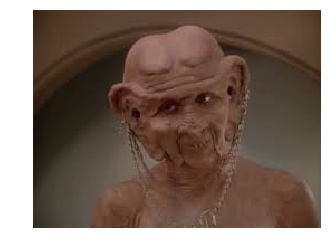

ferengi 0.479656
cardassian 0.233271
klingon 0.166641
jem hadar 0.0685635
vulcan 0.0261145
--------------------------------------------------------------------------------


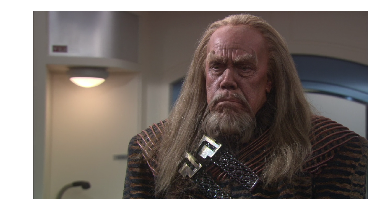

klingon 0.990304
ferengi 0.00748019
cardassian 0.000957266
human 0.000873284
vulcan 0.000197423
--------------------------------------------------------------------------------


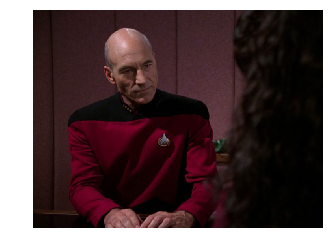

klingon 0.493563
ferengi 0.365703
vulcan 0.0835173
human 0.0287919
cardassian 0.026213
--------------------------------------------------------------------------------


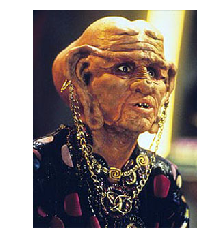

ferengi 0.87976
klingon 0.114602
cardassian 0.00322959
vulcan 0.00142883
jem hadar 0.000626739
--------------------------------------------------------------------------------


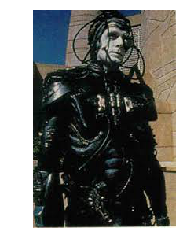

borg 0.893573
jem hadar 0.0789115
cardassian 0.0227462
klingon 0.00335884
ferengi 0.000946605
--------------------------------------------------------------------------------


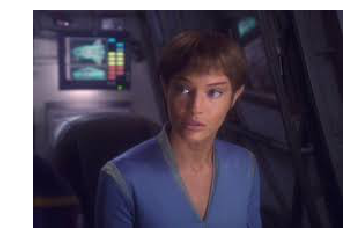

human 0.870262
vulcan 0.0712744
cardassian 0.0498792
ferengi 0.00361368
borg 0.00282399
--------------------------------------------------------------------------------


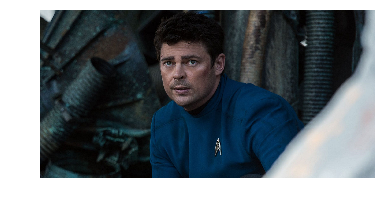

human 0.583739
klingon 0.268686
cardassian 0.0650896
vulcan 0.0552535
borg 0.0162653
--------------------------------------------------------------------------------


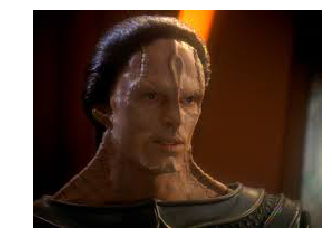

cardassian 0.968819
klingon 0.0214497
vulcan 0.00408712
borg 0.0034468
jem hadar 0.00129032
--------------------------------------------------------------------------------


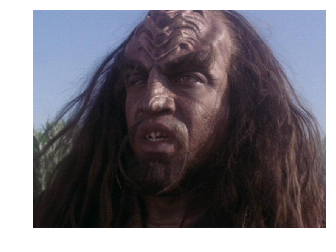

klingon 0.993508
vulcan 0.00422352
borg 0.00118432
cardassian 0.000436061
ferengi 0.000370665
--------------------------------------------------------------------------------


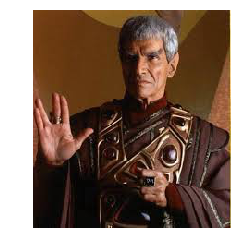

cardassian 0.614099
borg 0.218035
vulcan 0.0738446
jem hadar 0.0407319
klingon 0.0292576
--------------------------------------------------------------------------------


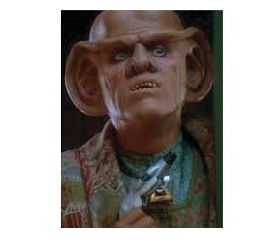

ferengi 0.804386
vulcan 0.163754
human 0.0161154
klingon 0.00673449
borg 0.00653336
--------------------------------------------------------------------------------


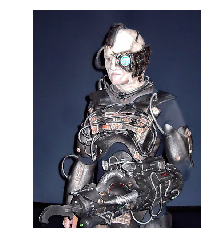

borg 0.93275
cardassian 0.0430875
jem hadar 0.0152289
ferengi 0.00808236
klingon 0.000482723
--------------------------------------------------------------------------------


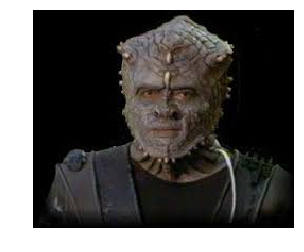

jem hadar 0.895082
ferengi 0.0556307
borg 0.0306406
human 0.00635995
cardassian 0.00607951
--------------------------------------------------------------------------------


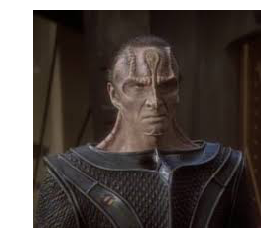

cardassian 0.973889
klingon 0.0120568
borg 0.00369704
jem hadar 0.00297989
vulcan 0.00270447
--------------------------------------------------------------------------------


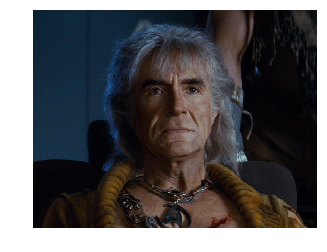

klingon 0.982926
ferengi 0.0127916
vulcan 0.00151499
borg 0.00101591
cardassian 0.00100892
--------------------------------------------------------------------------------


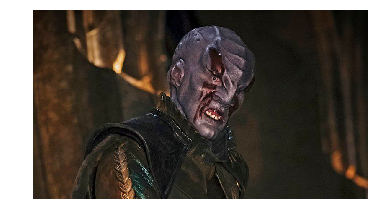

klingon 0.973718
borg 0.0083329
cardassian 0.00666137
vulcan 0.00463781
jem hadar 0.00346073
--------------------------------------------------------------------------------


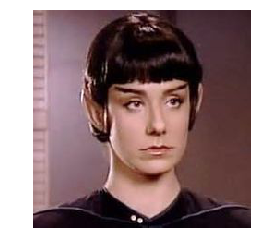

vulcan 0.441534
klingon 0.366059
cardassian 0.144901
human 0.0331227
jem hadar 0.00695839
--------------------------------------------------------------------------------


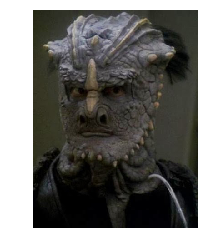

jem hadar 0.949475
ferengi 0.0288287
cardassian 0.00686745
vulcan 0.00605296
klingon 0.00432386
--------------------------------------------------------------------------------


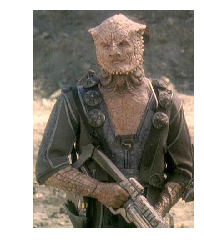

jem hadar 0.699248
borg 0.15604
cardassian 0.0593081
human 0.0361309
ferengi 0.025559
--------------------------------------------------------------------------------


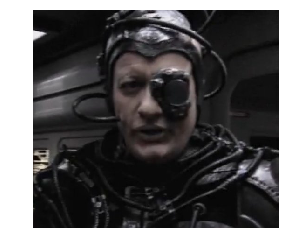

borg 0.366179
cardassian 0.303685
klingon 0.0853253
vulcan 0.0785909
jem hadar 0.0745229
--------------------------------------------------------------------------------


In [38]:
# Test the model on data not previously used
import os

testdata='dataset/test/'

for filename in os.listdir(testdata):
    if not filename.startswith('.'):
    
        image=testdata+filename

        im = img.imread(image)
        plt.axis('off')
        plt.imshow(im)
        plt.show()
        
        # Input sizes and input layer name args are Inception specific; else (with MobileNet) use "$IMAGE_SIZE" for sizes

        %run ./submodules/tensorflow-for-poets-2/scripts/label_image \
          --graph=tf_files/retrained_graph.pb \
          --input_height=299 \
          --input_width=299 \
          --input_layer="Mul" \
          --image "$image"
        print "-"*80